In [6]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, ScoutingNanoAODSchema, ScoutingJMENanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
import math
plt.style.use(mplhep.style.CMS)

In [34]:
low = util.load("outfiles/2022/jes_ScoutingPFMonitor_2022-CHS_had_low_offlinePuppi.coffea")[0]
high = util.load("outfiles/2022/jes_ScoutingPFMonitor_2022-CHS_had_high_offlinePuppi.coffea")[0]

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

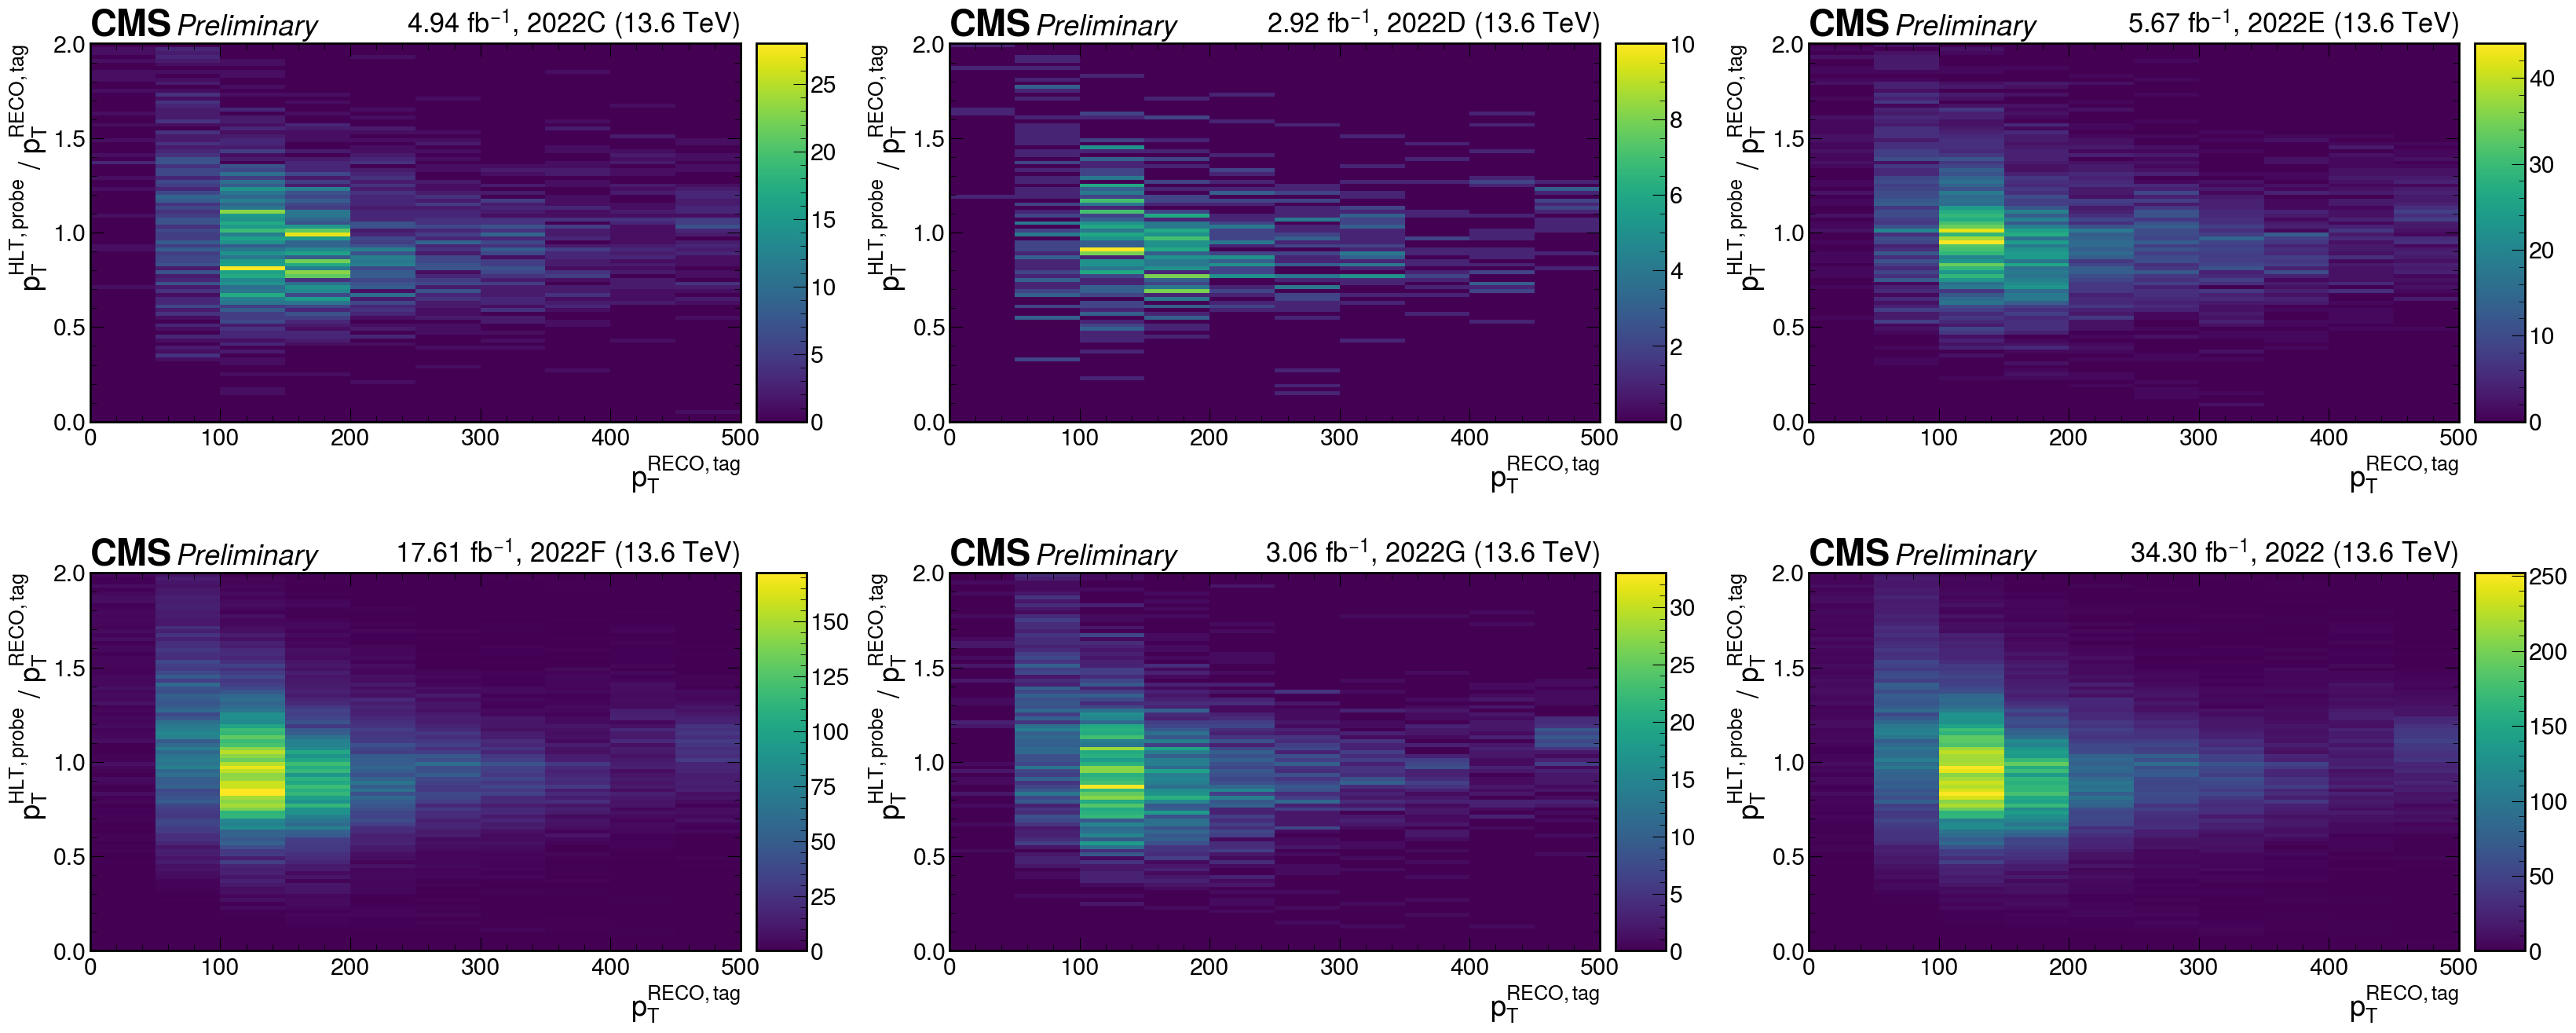

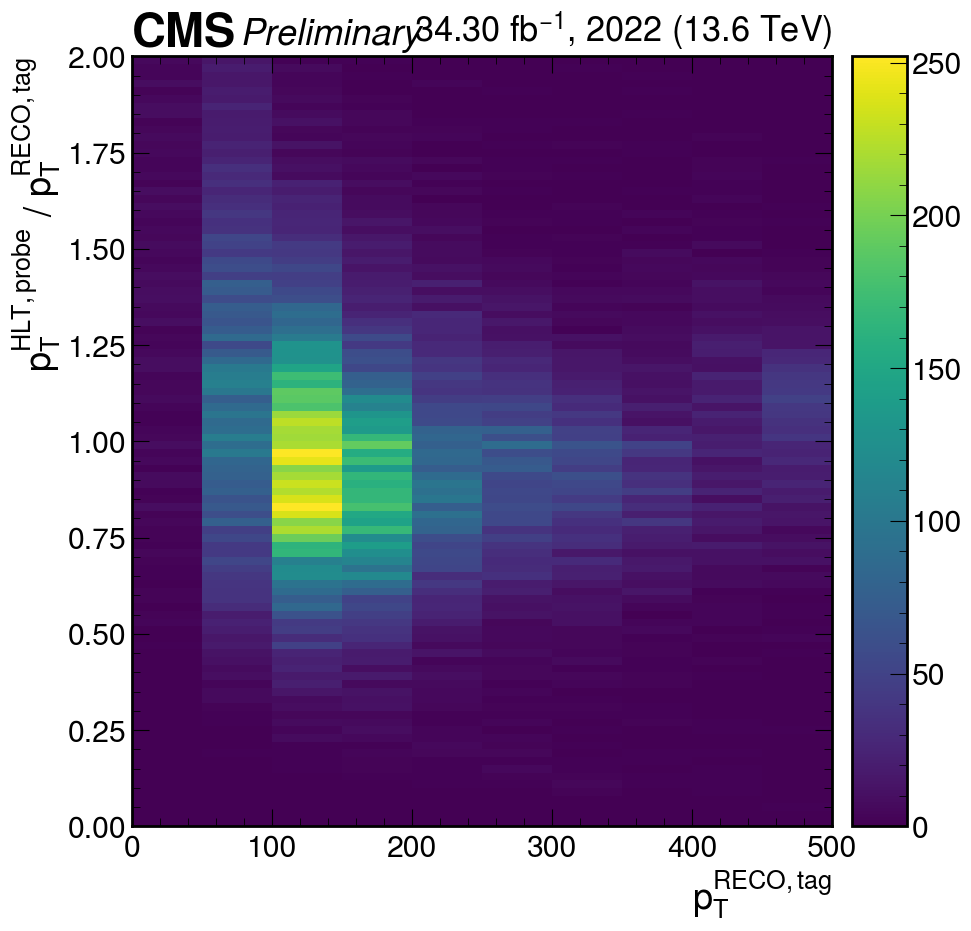

In [15]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low)]: #, ("high", high)]:
        
        for eta1, eta2 in [(sum, sum)]:
        
            h = output["h1"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                      "eta1" : sum,
                      "eta2" : sum}]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            mplhep.hist2dplot(h, ax=ax)
            
            if not era:
                
                mplhep.hist2dplot(h, ax=ax1)

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")

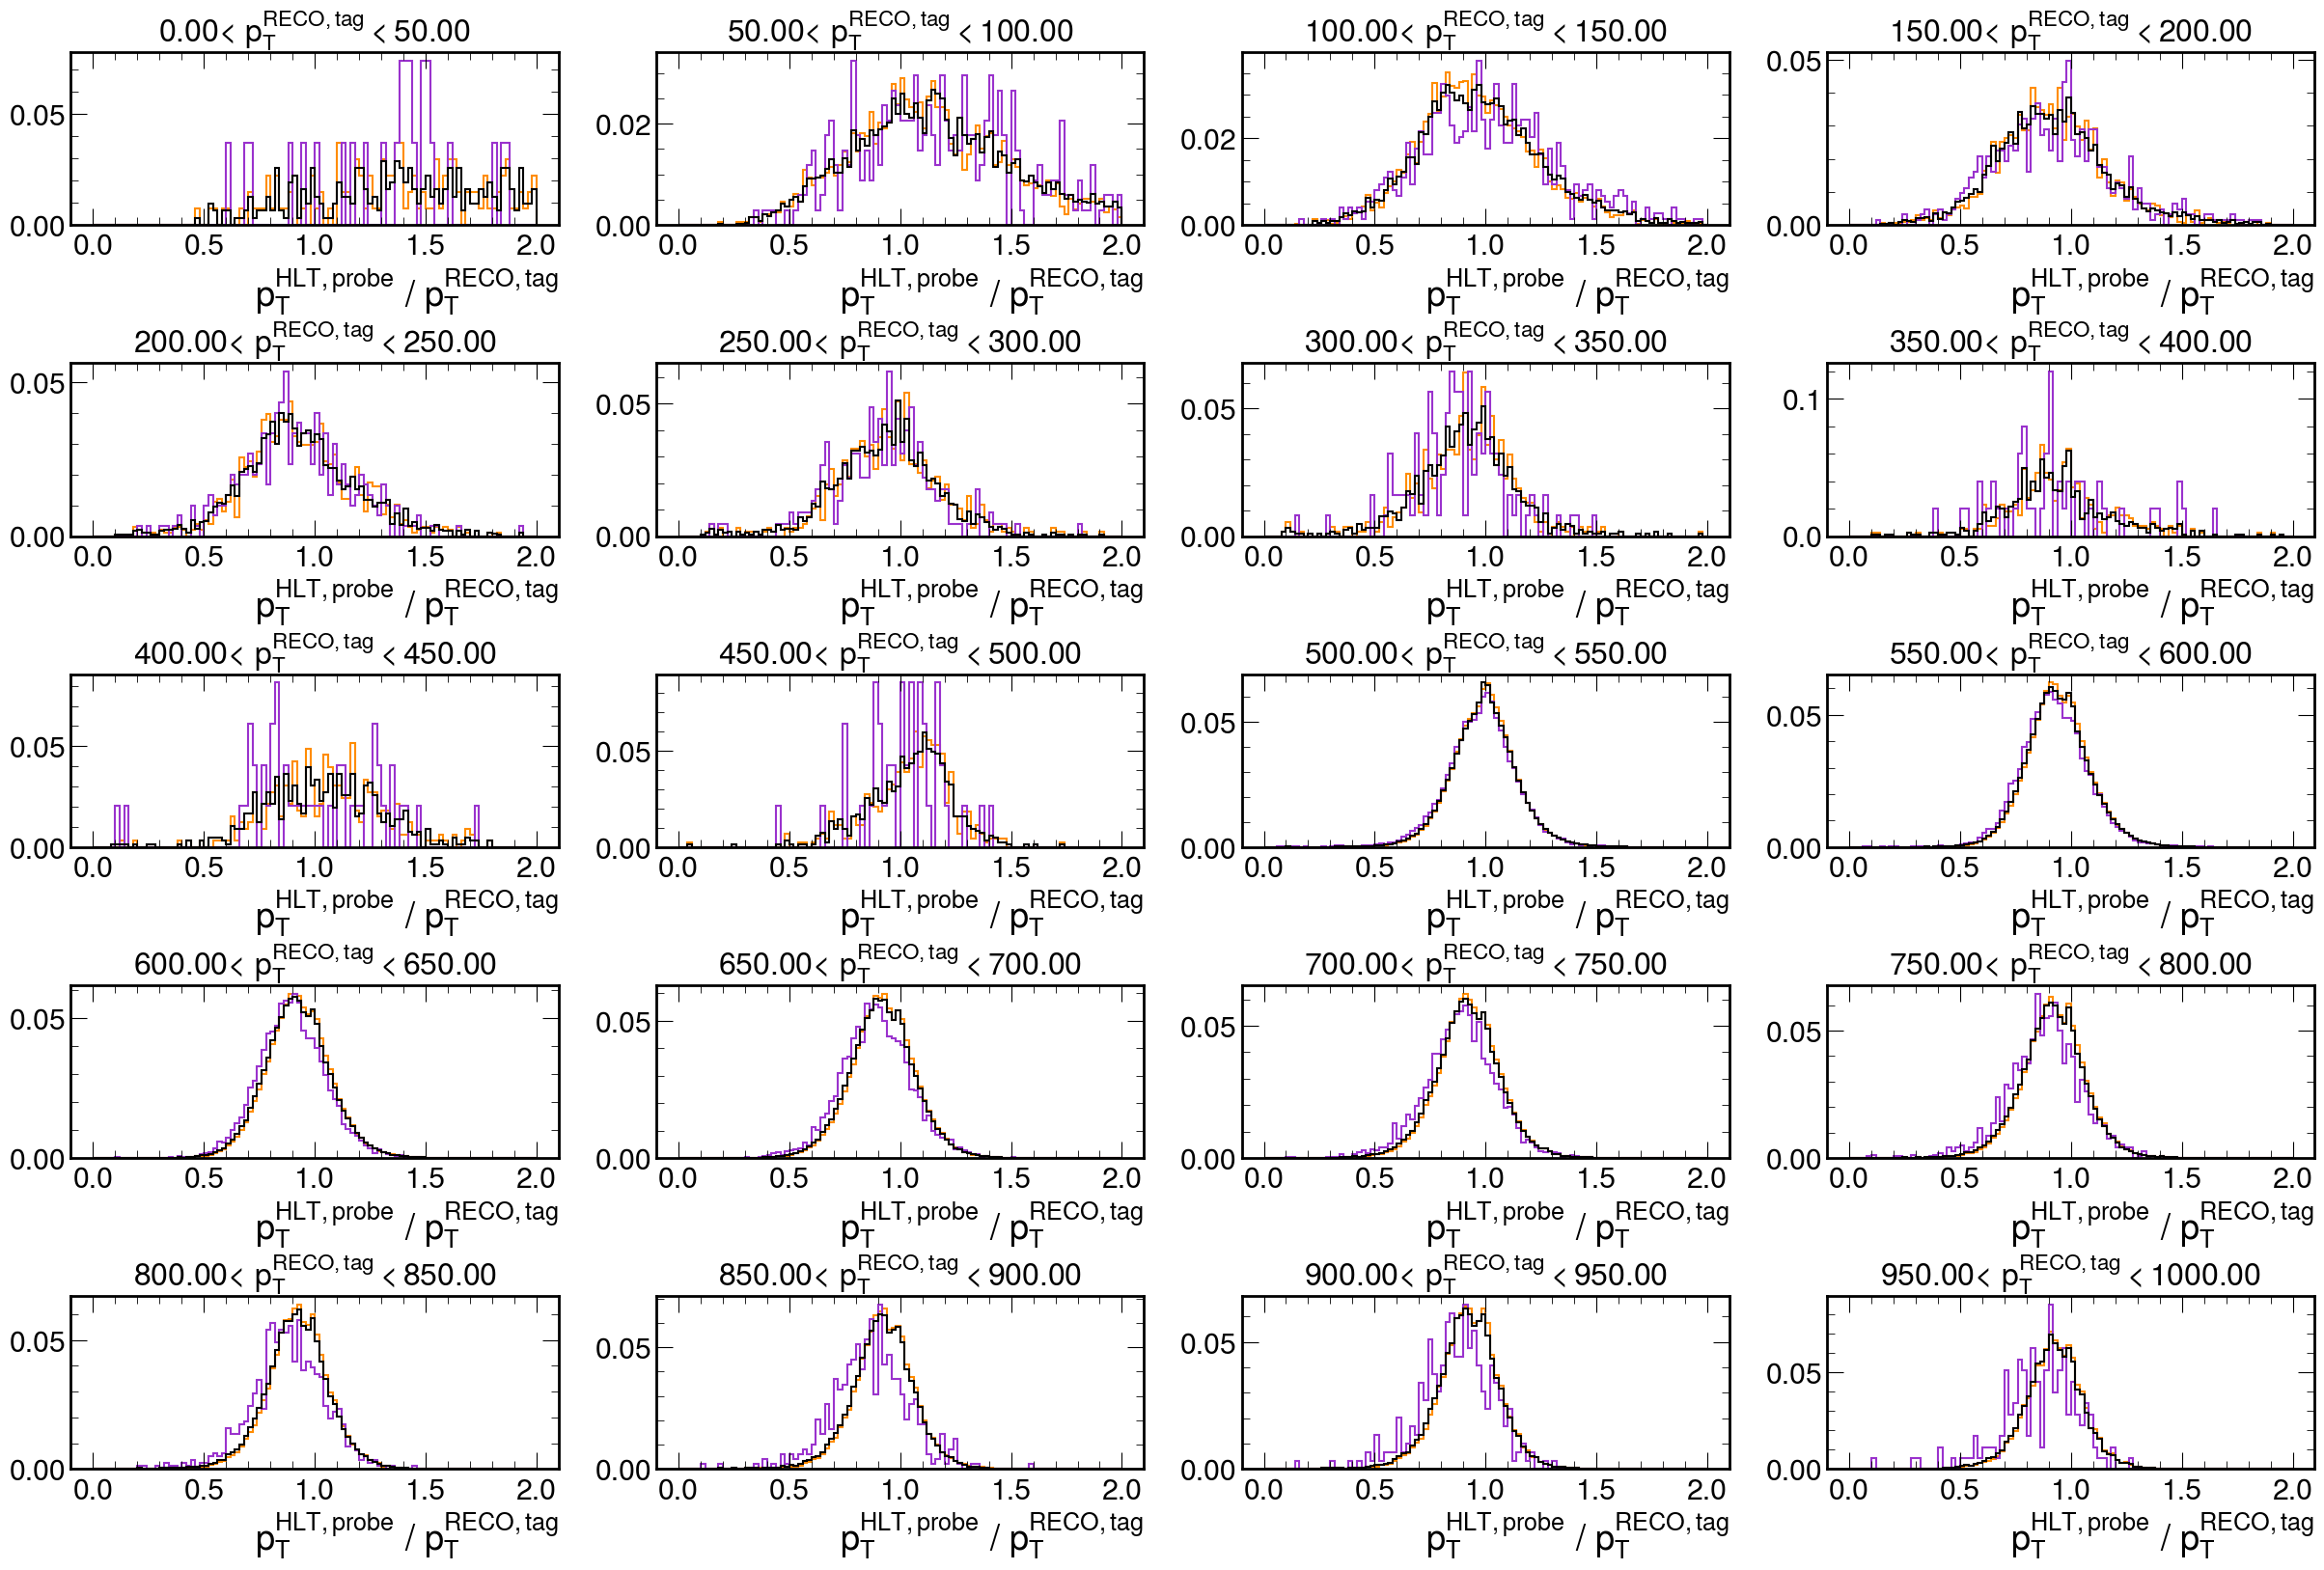

In [35]:
fig, axs = plt.subplots(10, 4, figsize=(30,40))
plt.subplots_adjust(wspace=0.2, hspace=0.8)

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

row = 0
column = 0

era = ""

for pt, output in [("low", low), ("high", high)]:
    
    centers = output["h1"].project("pt").axes[0].centers
    edges = output["h1"].project("pt").axes[0].edges

    for i, _ in enumerate(centers):
        
        if centers[i] > 1000: break

        ax = axs[row, column]

        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:

            h = output["h1"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                              "eta1" : eta1,
                              "eta2" : eta2,
                              "pt" : i}]
            h *= 1 / h.sum() if h.sum() != 0 else 1

            if i == (len(centers) - 1) and pt == "high":
                mplhep.histplot(h, color=colour[eta1], ax=ax, label=label[eta1])
                #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            else:
                mplhep.histplot(h, color=colour[eta1], ax=ax)

            ax.set_title(f"{edges[i]:.2f}" + r"< $p_T^{RECO,tag} <$" + f"{edges[i+1]:.2f}", fontsize=23)

        column += 1
        if column > 3:
            column = 0
            row += 1
        
for ax in axs.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

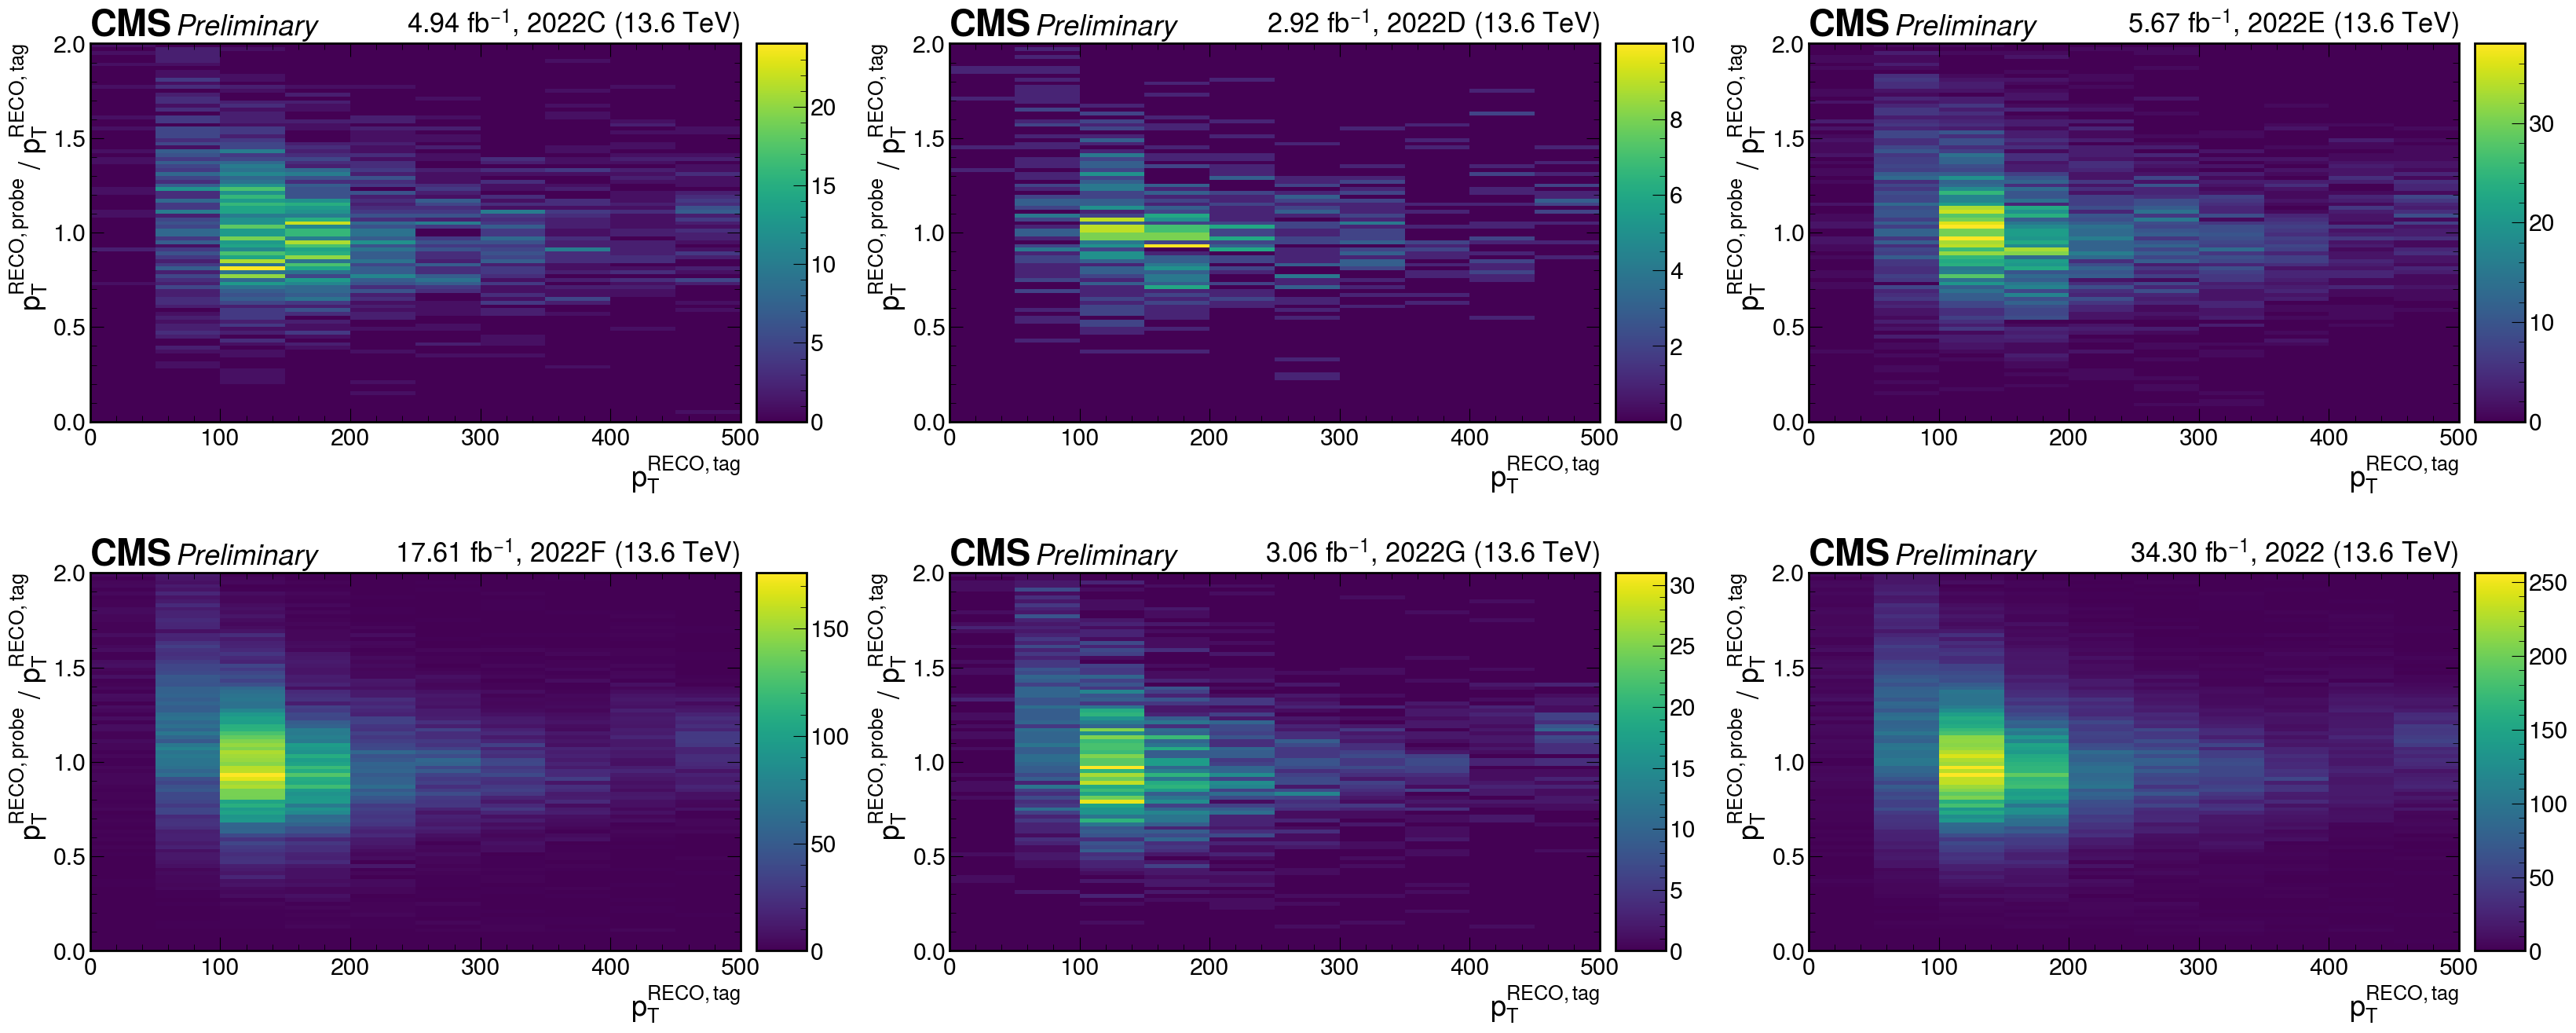

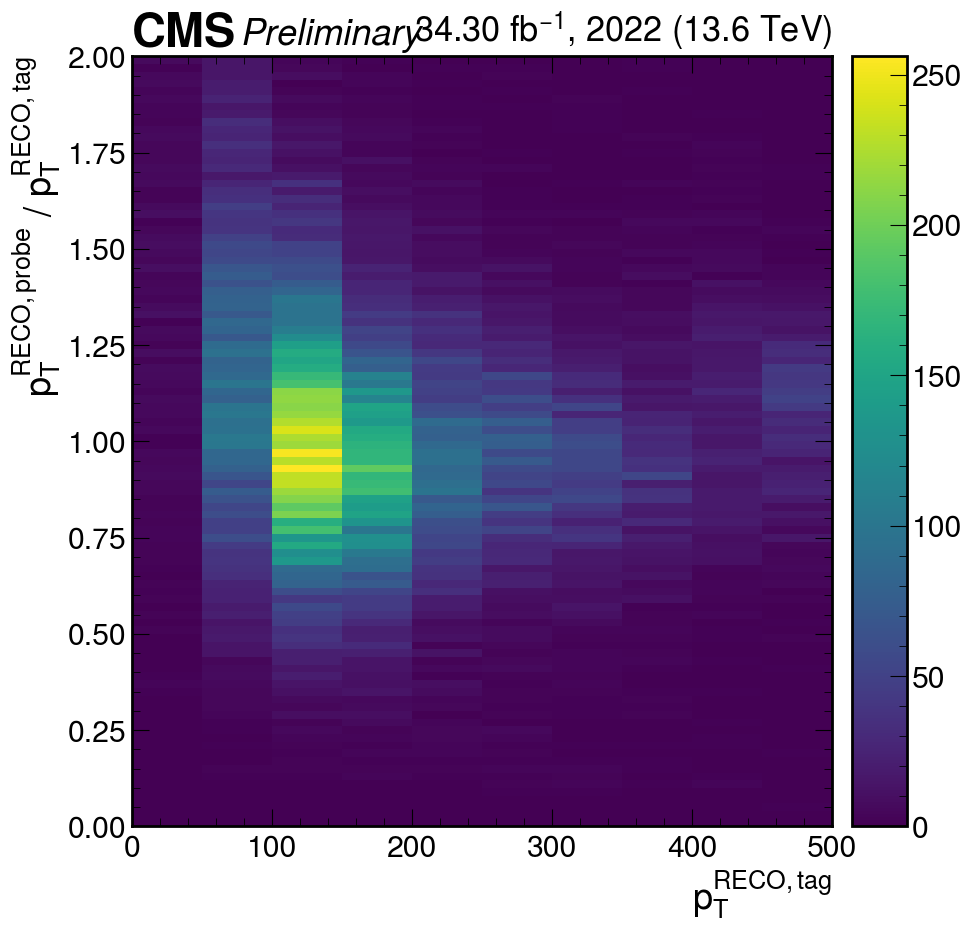

In [25]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low)]: #, ("high", high)]:
        
        for eta1, eta2 in [(sum, sum)]:
        
            h = output["h2"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                      "eta1" : sum,
                      "eta2" : sum}]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            mplhep.hist2dplot(h, ax=ax)
            
            if not era:
                
                mplhep.hist2dplot(h, ax=ax1)

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")

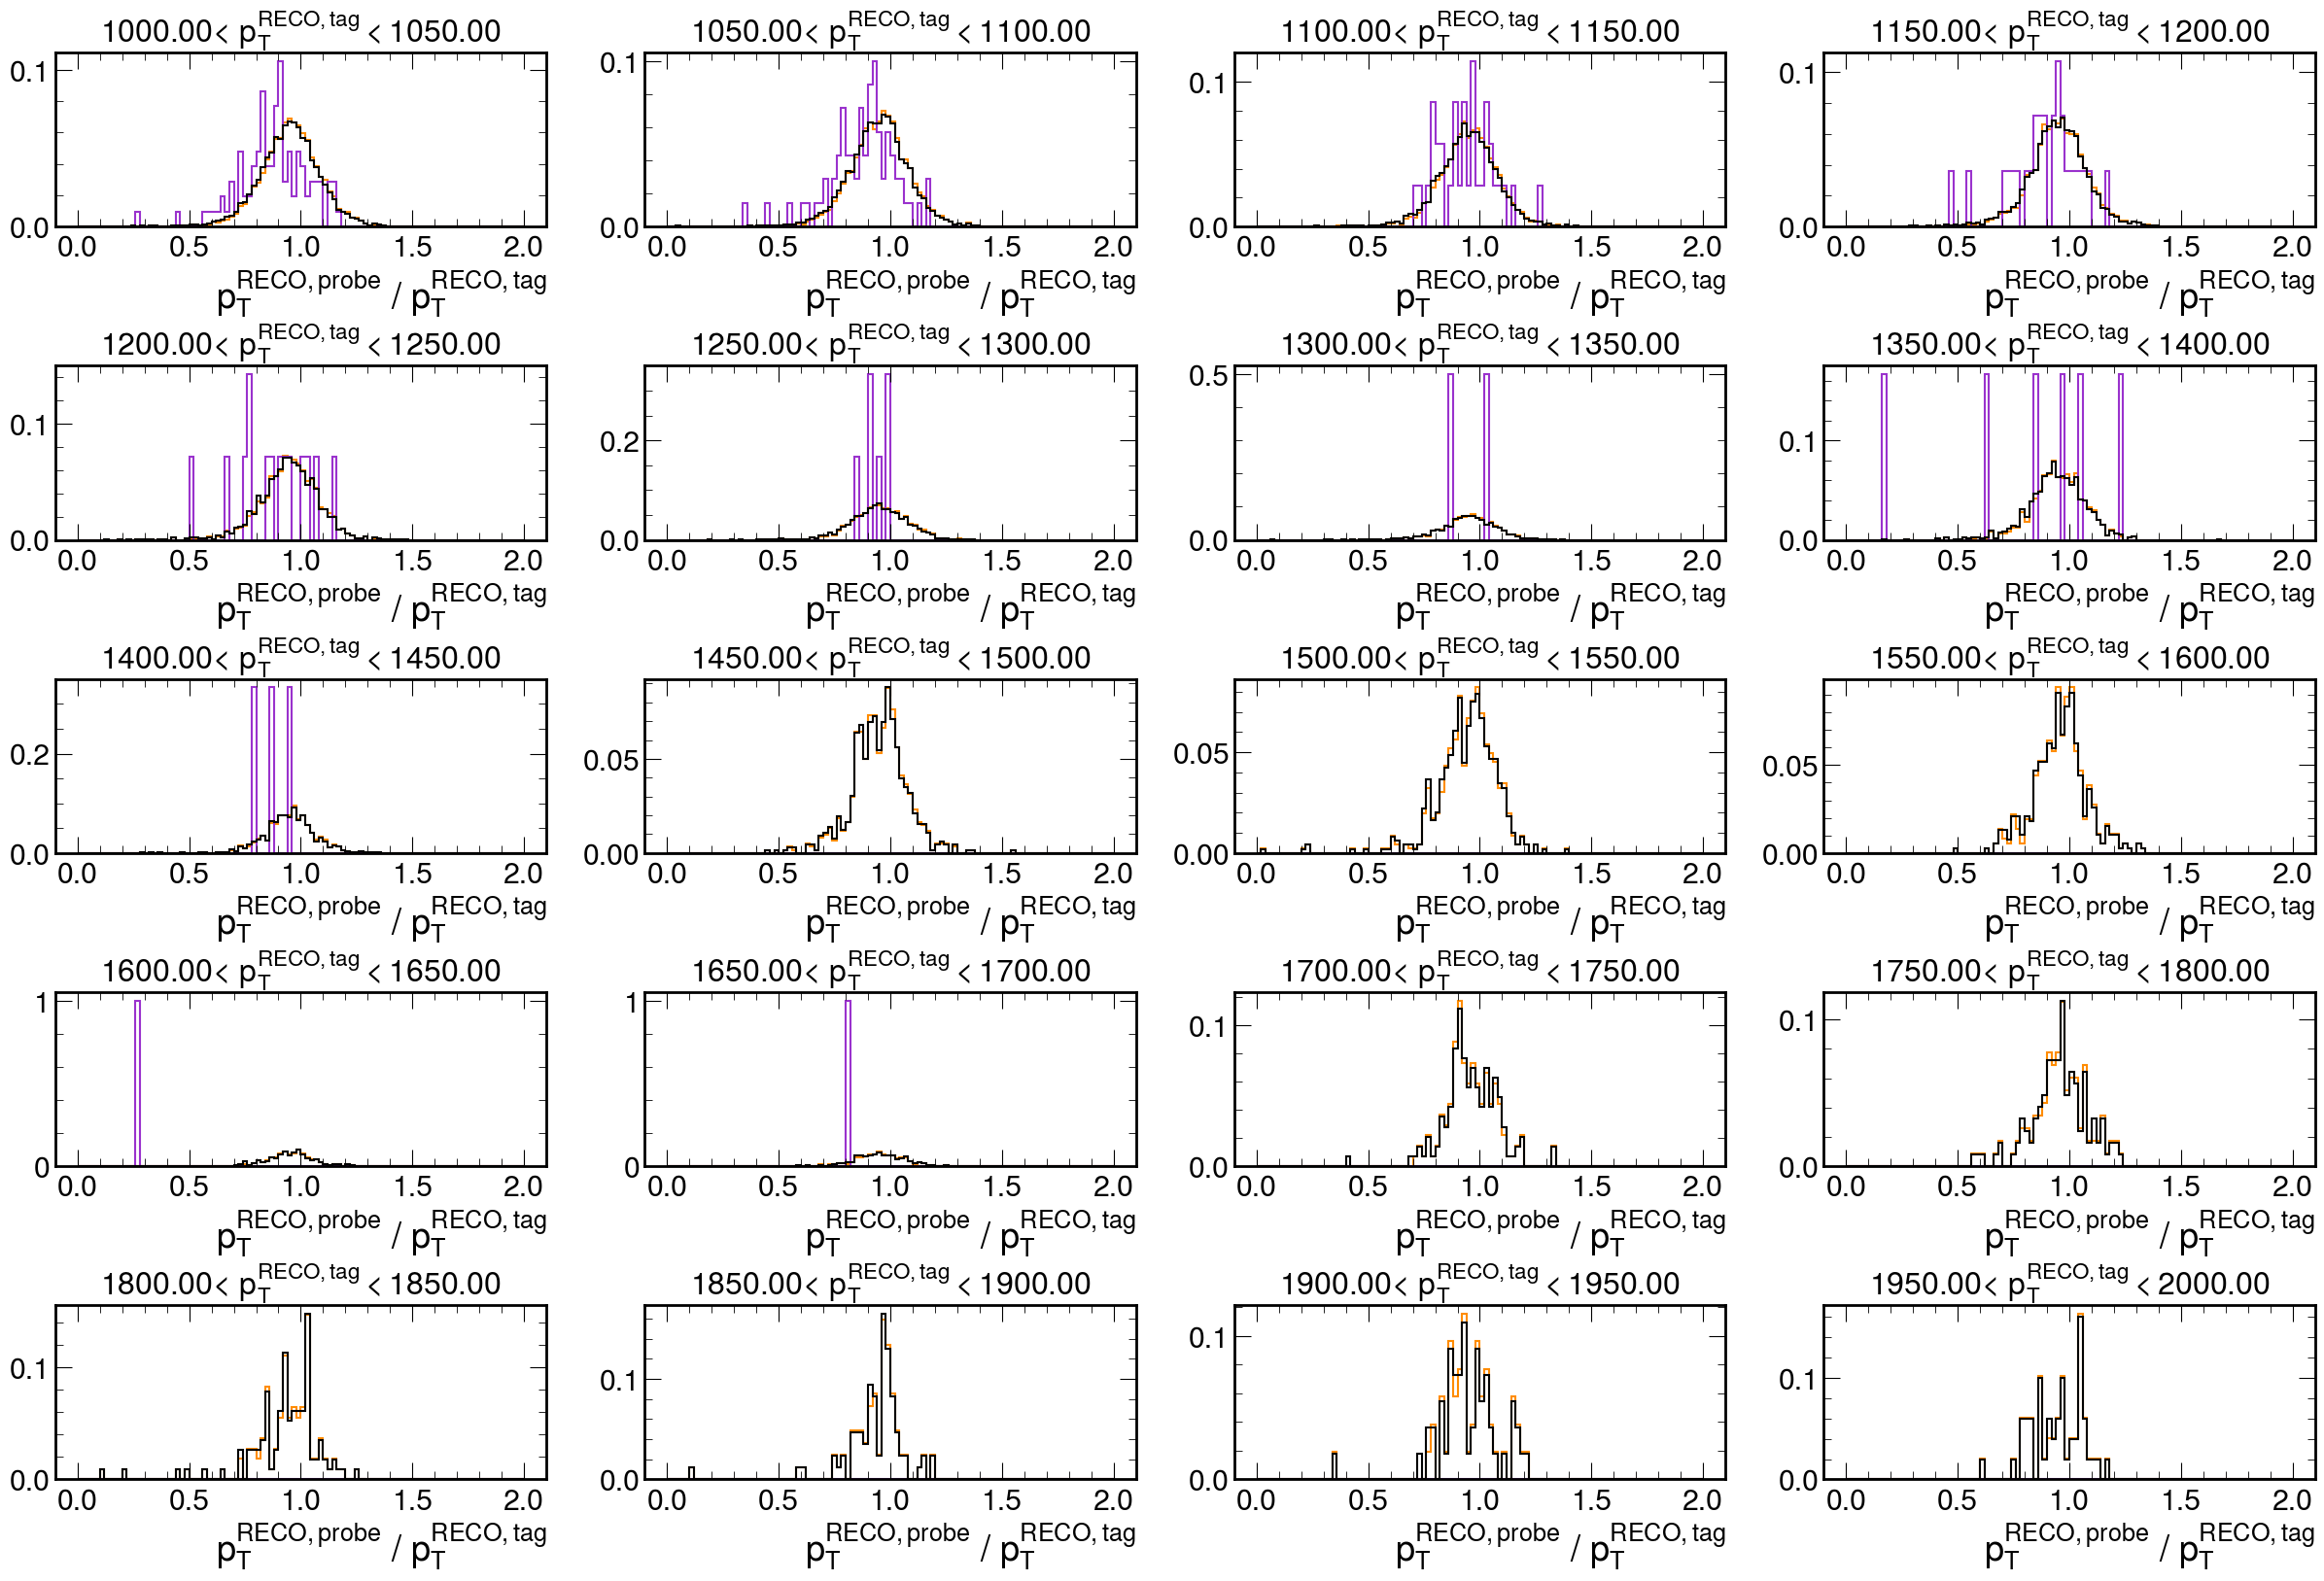

In [23]:
fig, axs = plt.subplots(10, 4, figsize=(30,40))
plt.subplots_adjust(wspace=0.2, hspace=0.8)

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

row = 0
column = 0

era = ""

for pt, output in [("low", low), ("high", high)]:
    
    centers = output["h2"].project("pt").axes[0].centers
    edges = output["h2"].project("pt").axes[0].edges

    for i, _ in enumerate(centers):
        
        if centers[i] < 1000: continue

        ax = axs[row, column]

        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:

            h = output["h2"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                              "eta1" : eta1,
                              "eta2" : eta2,
                              "pt" : i}]
            h *= 1 / h.sum() if h.sum() != 0 else 1

            if i == (len(centers) - 1) and pt == "high":
                mplhep.histplot(h, color=colour[eta1], ax=ax, label=label[eta1])
                #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            else:
                mplhep.histplot(h, color=colour[eta1], ax=ax)

            ax.set_title(f"{edges[i]:.2f}" + r"< $p_T^{RECO,tag} <$" + f"{edges[i+1]:.2f}", fontsize=23)

        column += 1
        if column > 3:
            column = 0
            row += 1
        
for ax in axs.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

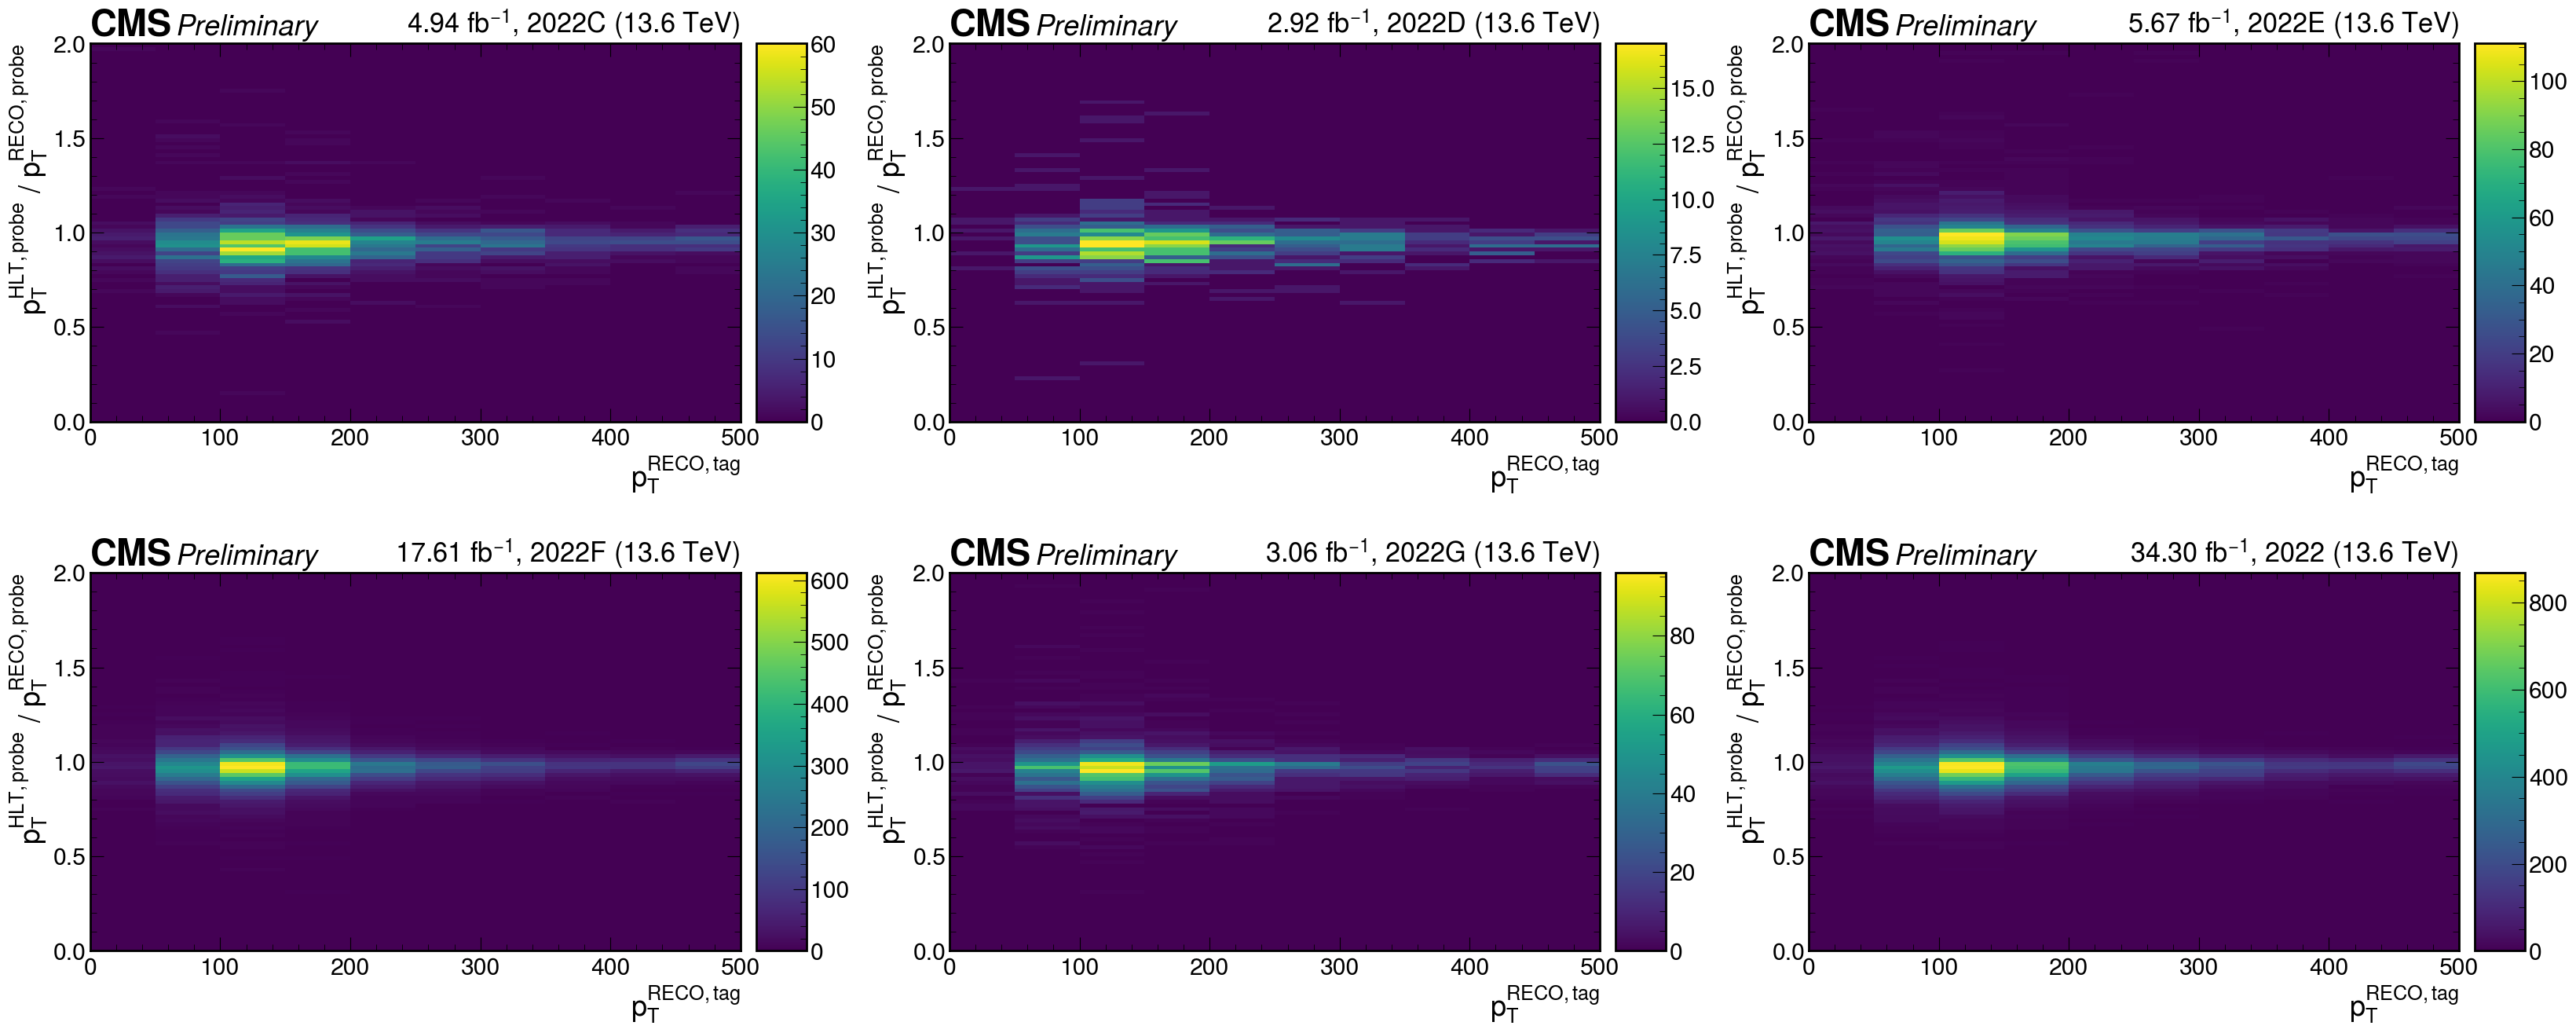

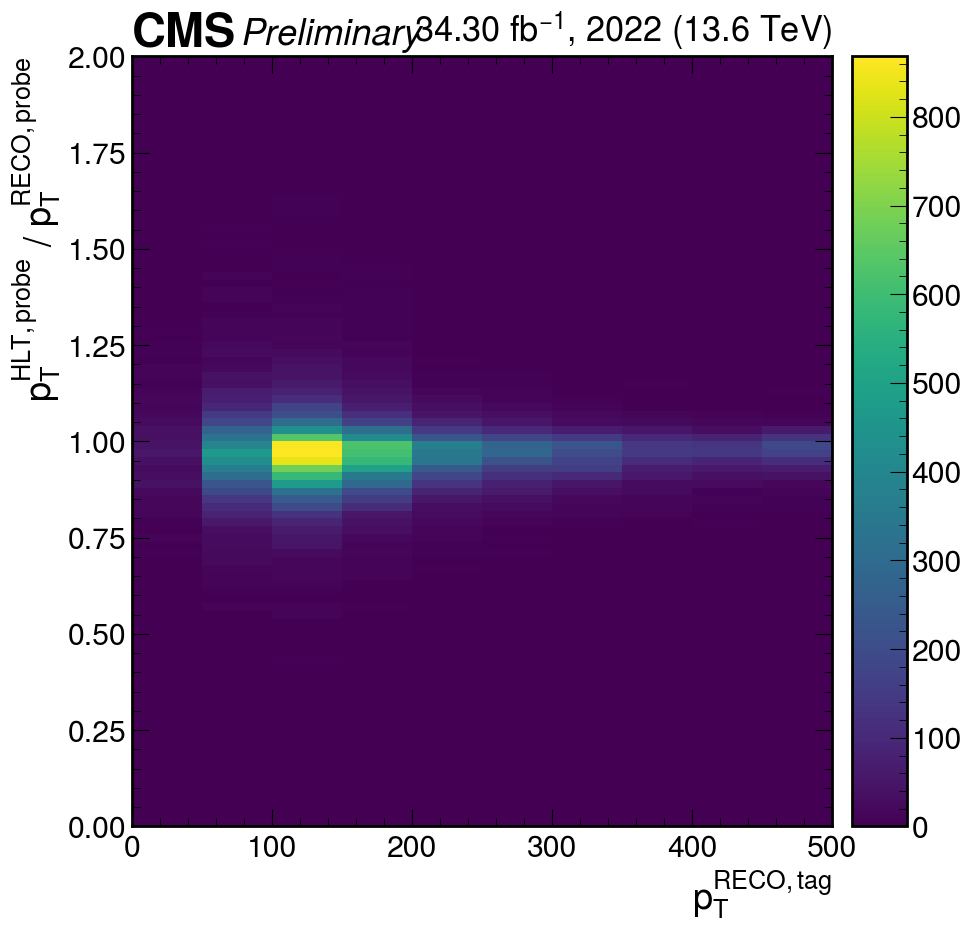

In [27]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low)]: #, ("high", high)]:
        
        for eta1, eta2 in [(sum, sum)]:
        
            h = output["h3"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                      "eta1" : sum,
                      "eta2" : sum}]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            mplhep.hist2dplot(h, ax=ax)
            
            if not era:
                
                mplhep.hist2dplot(h, ax=ax1)

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")

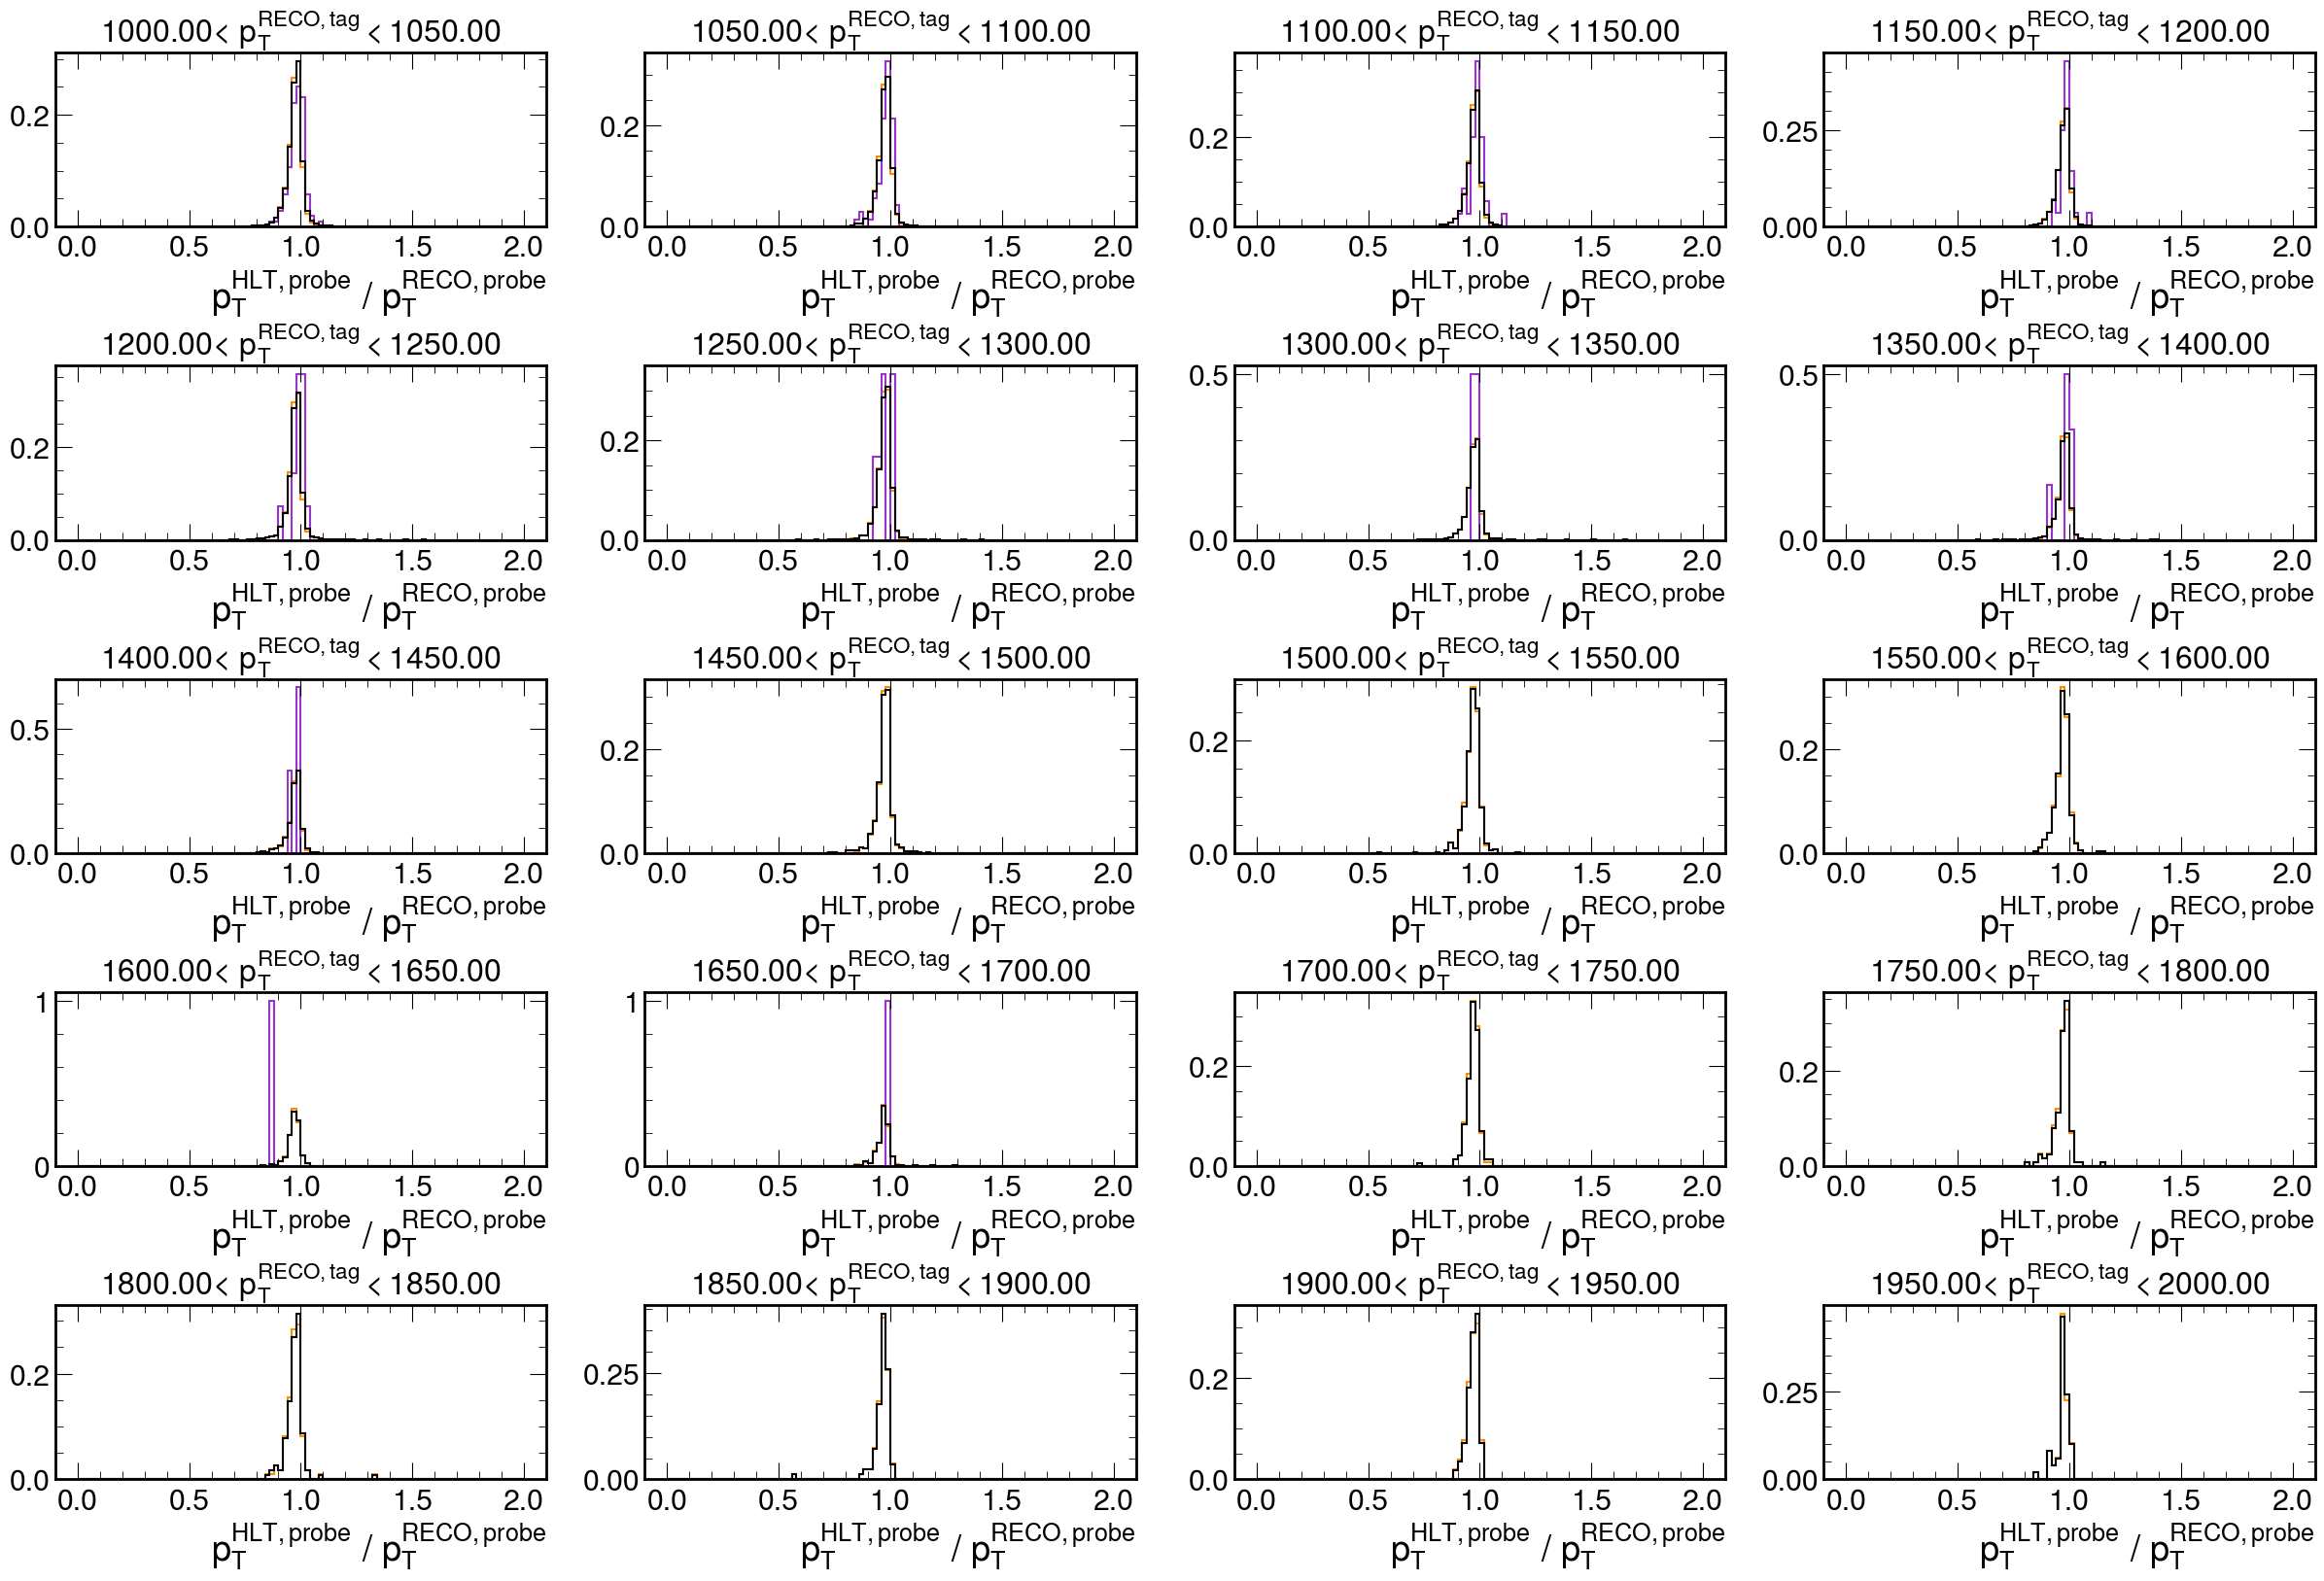

In [26]:
fig, axs = plt.subplots(10, 4, figsize=(30,40))
plt.subplots_adjust(wspace=0.2, hspace=0.8)

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

row = 0
column = 0

era = ""

for pt, output in [("low", low), ("high", high)]:
    
    centers = output["h3"].project("pt").axes[0].centers
    edges = output["h3"].project("pt").axes[0].edges

    for i, _ in enumerate(centers):

        if centers[i] < 1000: continue
        
        ax = axs[row, column]

        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:

            h = output["h3"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                              "eta1" : eta1,
                              "eta2" : eta2,
                              "pt" : i}]
            h *= 1 / h.sum() if h.sum() != 0 else 1

            if i == (len(centers) - 1) and pt == "high":
                mplhep.histplot(h, color=colour[eta1], ax=ax, label=label[eta1])
                #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            else:
                mplhep.histplot(h, color=colour[eta1], ax=ax)

            ax.set_title(f"{edges[i]:.2f}" + r"< $p_T^{RECO,tag} <$" + f"{edges[i+1]:.2f}", fontsize=23)

        column += 1
        if column > 3:
            column = 0
            row += 1
        
for ax in axs.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

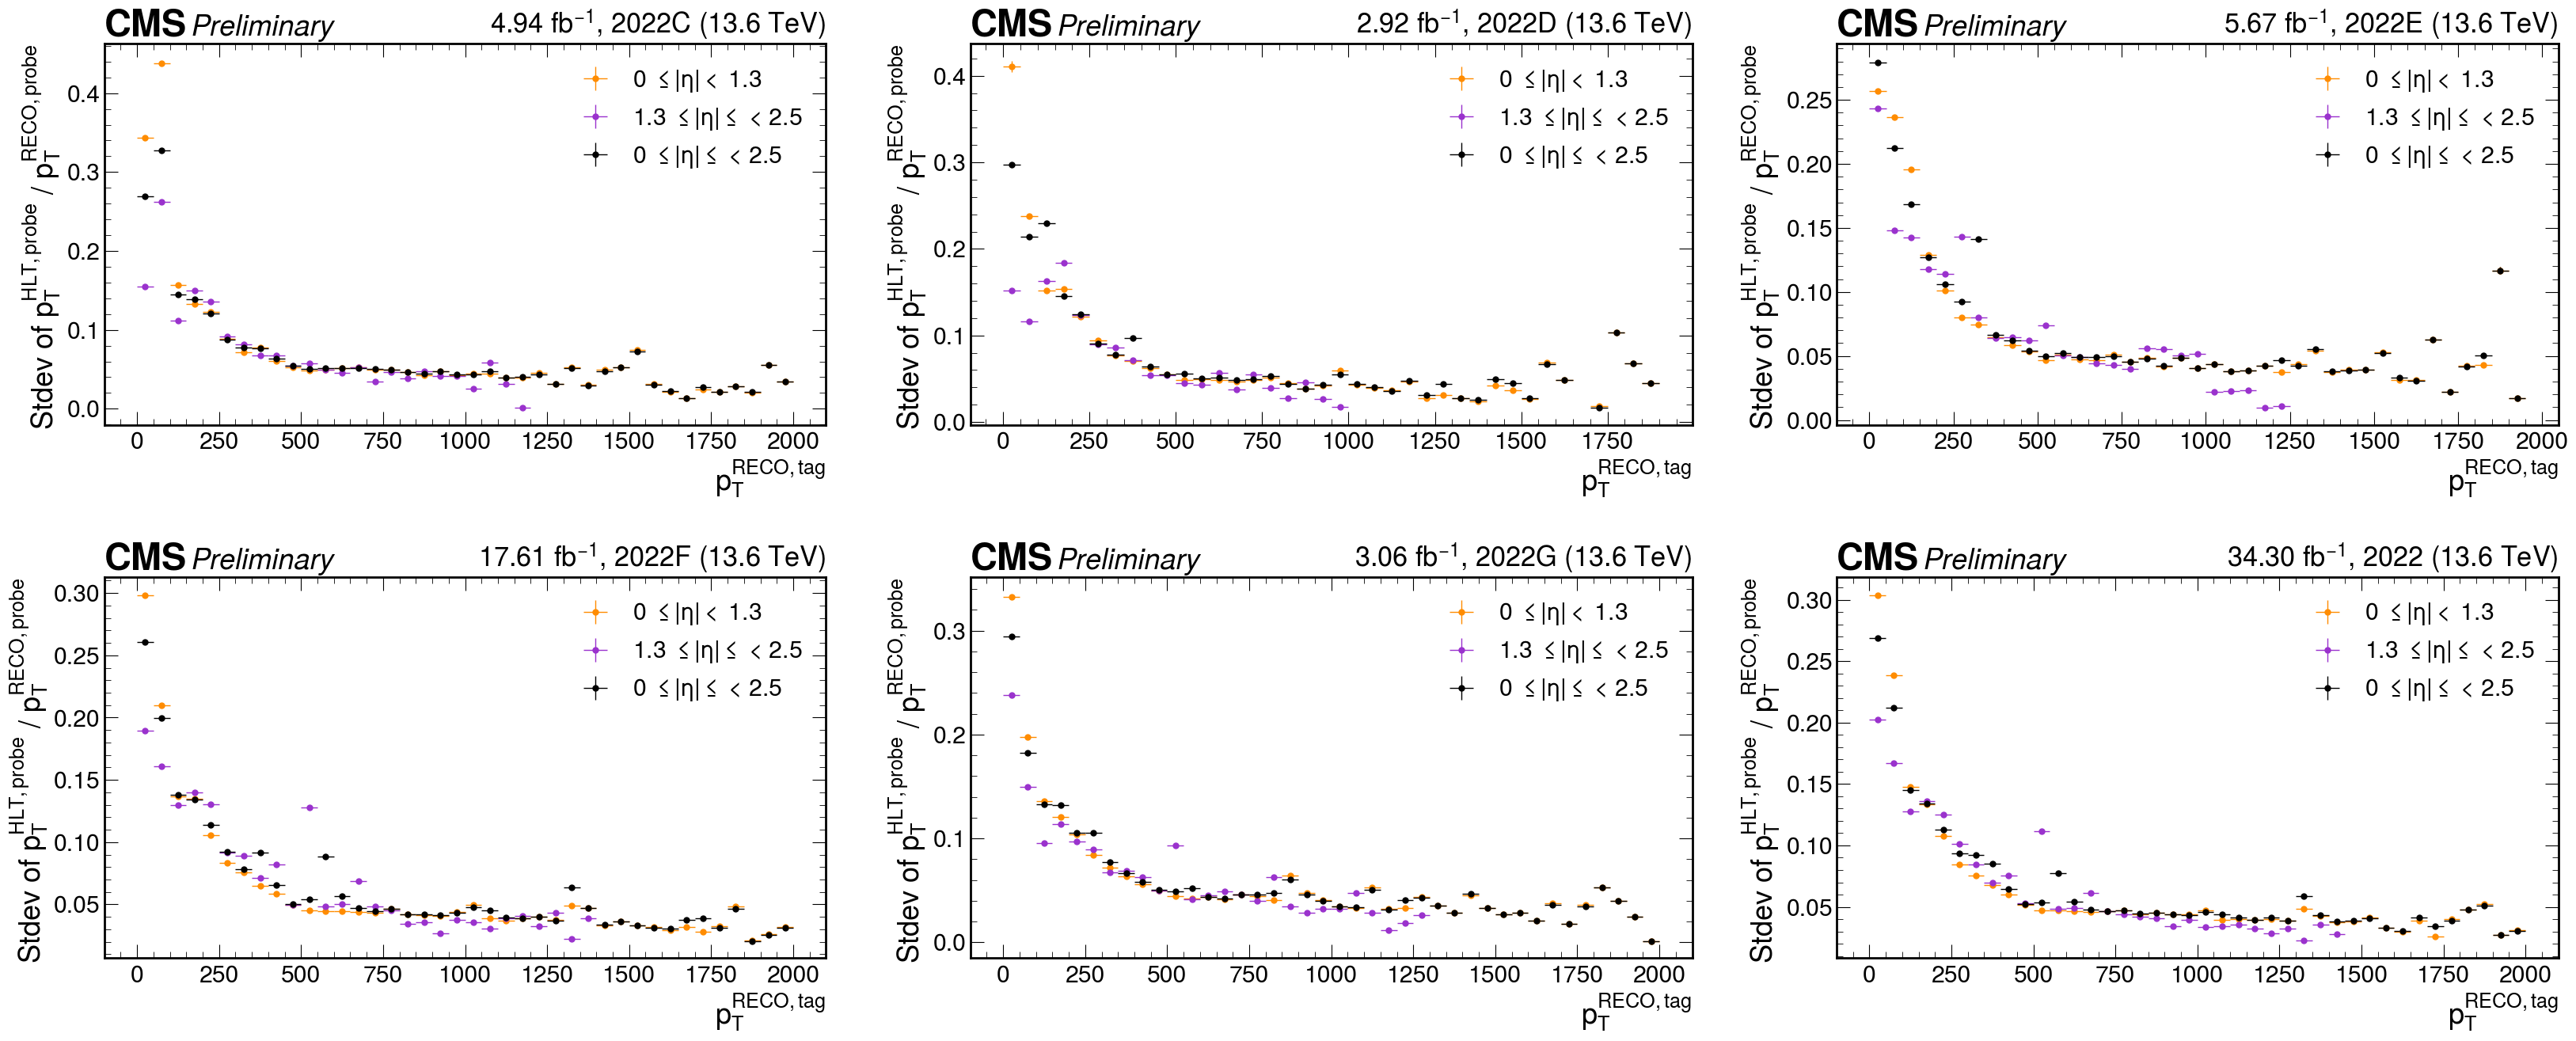

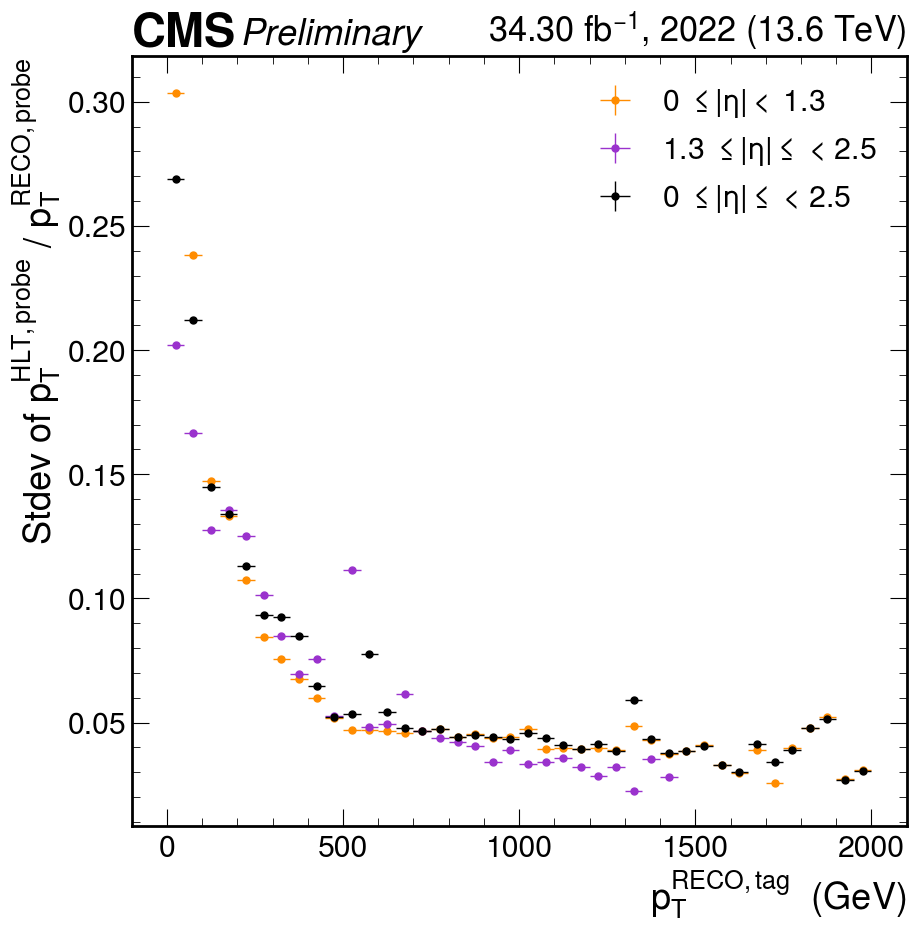

In [30]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_err(meanhist):
    return err(meanhist)**2 / np.sqrt(2 * meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low), ("high", high)]:
        
        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:
        
            meanhist = output["h3_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            ax.errorbar(
                meanhist.axes[0].centers,
                err(meanhist),
                xerr=binwidth/2,
                yerr=err_err(meanhist),
                **data_err_opts,
                label=label[eta1] if pt == "low" else "",
            )
            
            if not era:
                
                ax1.errorbar(
                        meanhist.axes[0].centers,
                        err(meanhist),
                        xerr=binwidth/2,
                        yerr=err_err(meanhist),
                        **data_err_opts,
                        label=label[eta1] if pt == "low" else "",
                    )

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    ax.set_xlabel(r"$p_T^{RECO,tag}$")
    ax.set_ylabel(r"Stdev of $p_T^{HLT,probe}$ / $p_T^{RECO,probe}$")
    ax.legend(loc="best")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
ax1.set_xlabel(r"$p_T^{RECO,tag}$  (GeV)")
ax1.set_ylabel(r"Stdev of $p_T^{HLT,probe}$ / $p_T^{RECO,probe}$")
ax1.legend(loc="best")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary'))

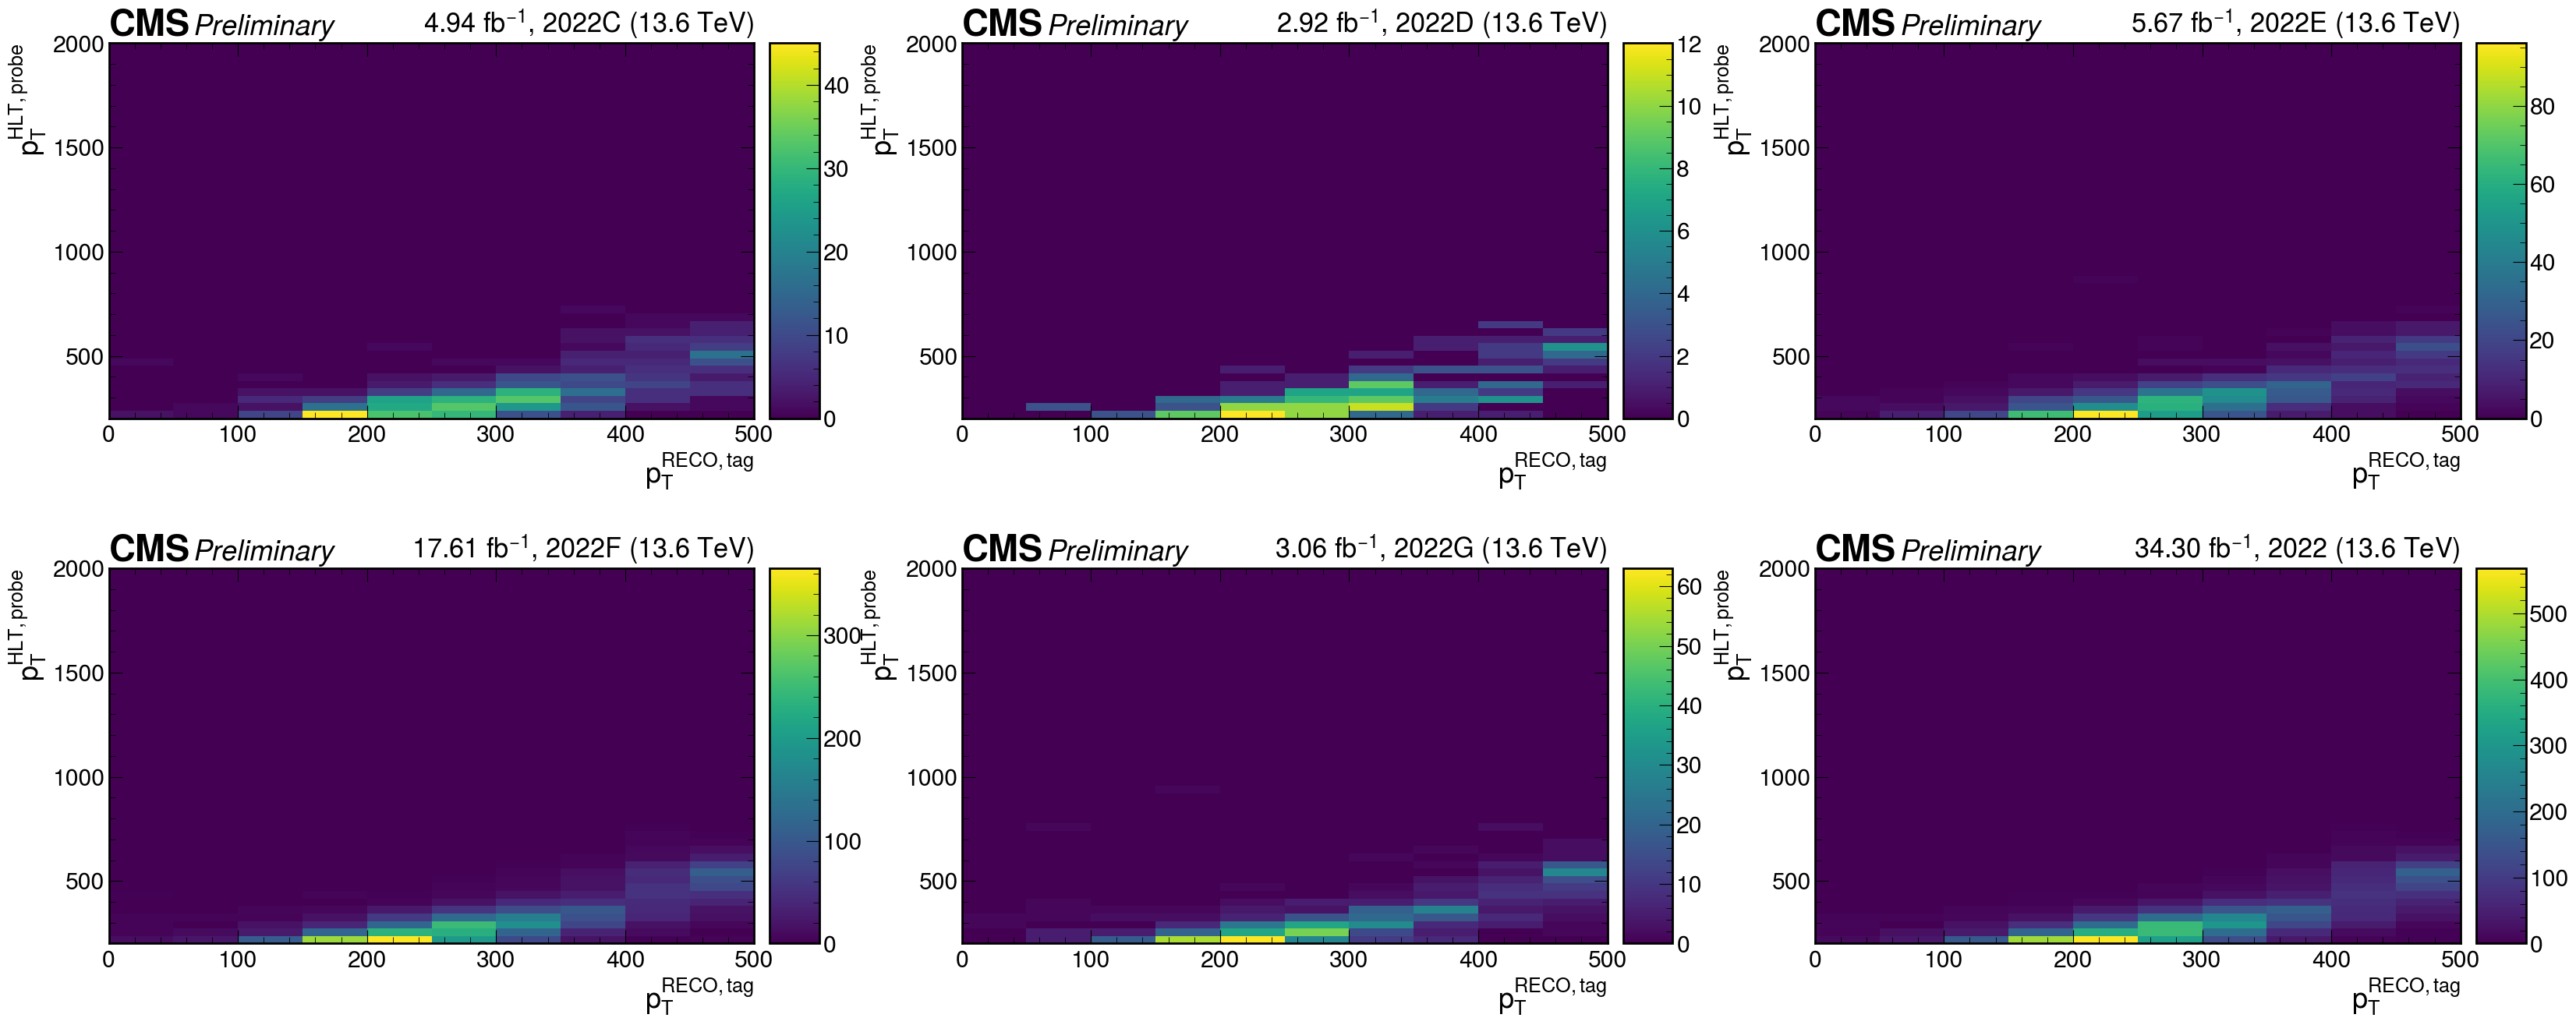

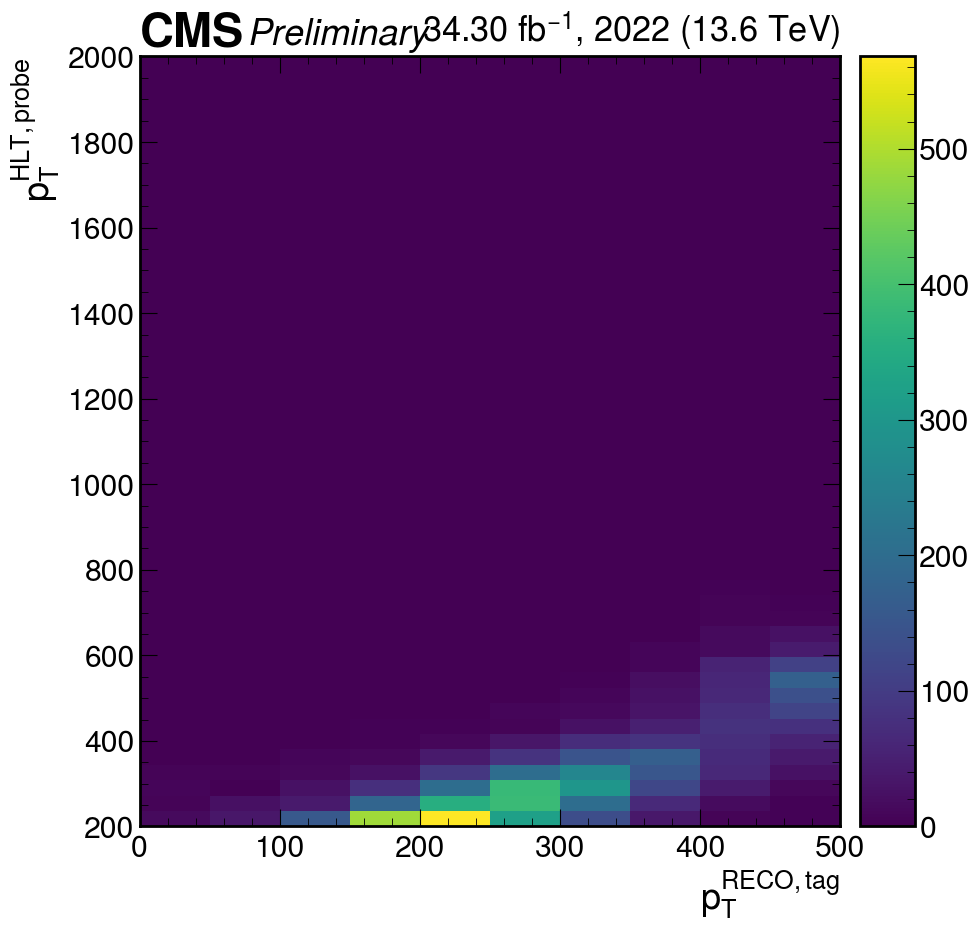

In [31]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low)]: #, ("high", high)]:
        
        for eta1, eta2 in [(sum, sum)]:
        
            h = output["h4"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                      "eta1" : sum,
                      "eta2" : sum}]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            mplhep.hist2dplot(h, ax=ax)
            
            if not era:
                
                mplhep.hist2dplot(h, ax=ax1)

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")

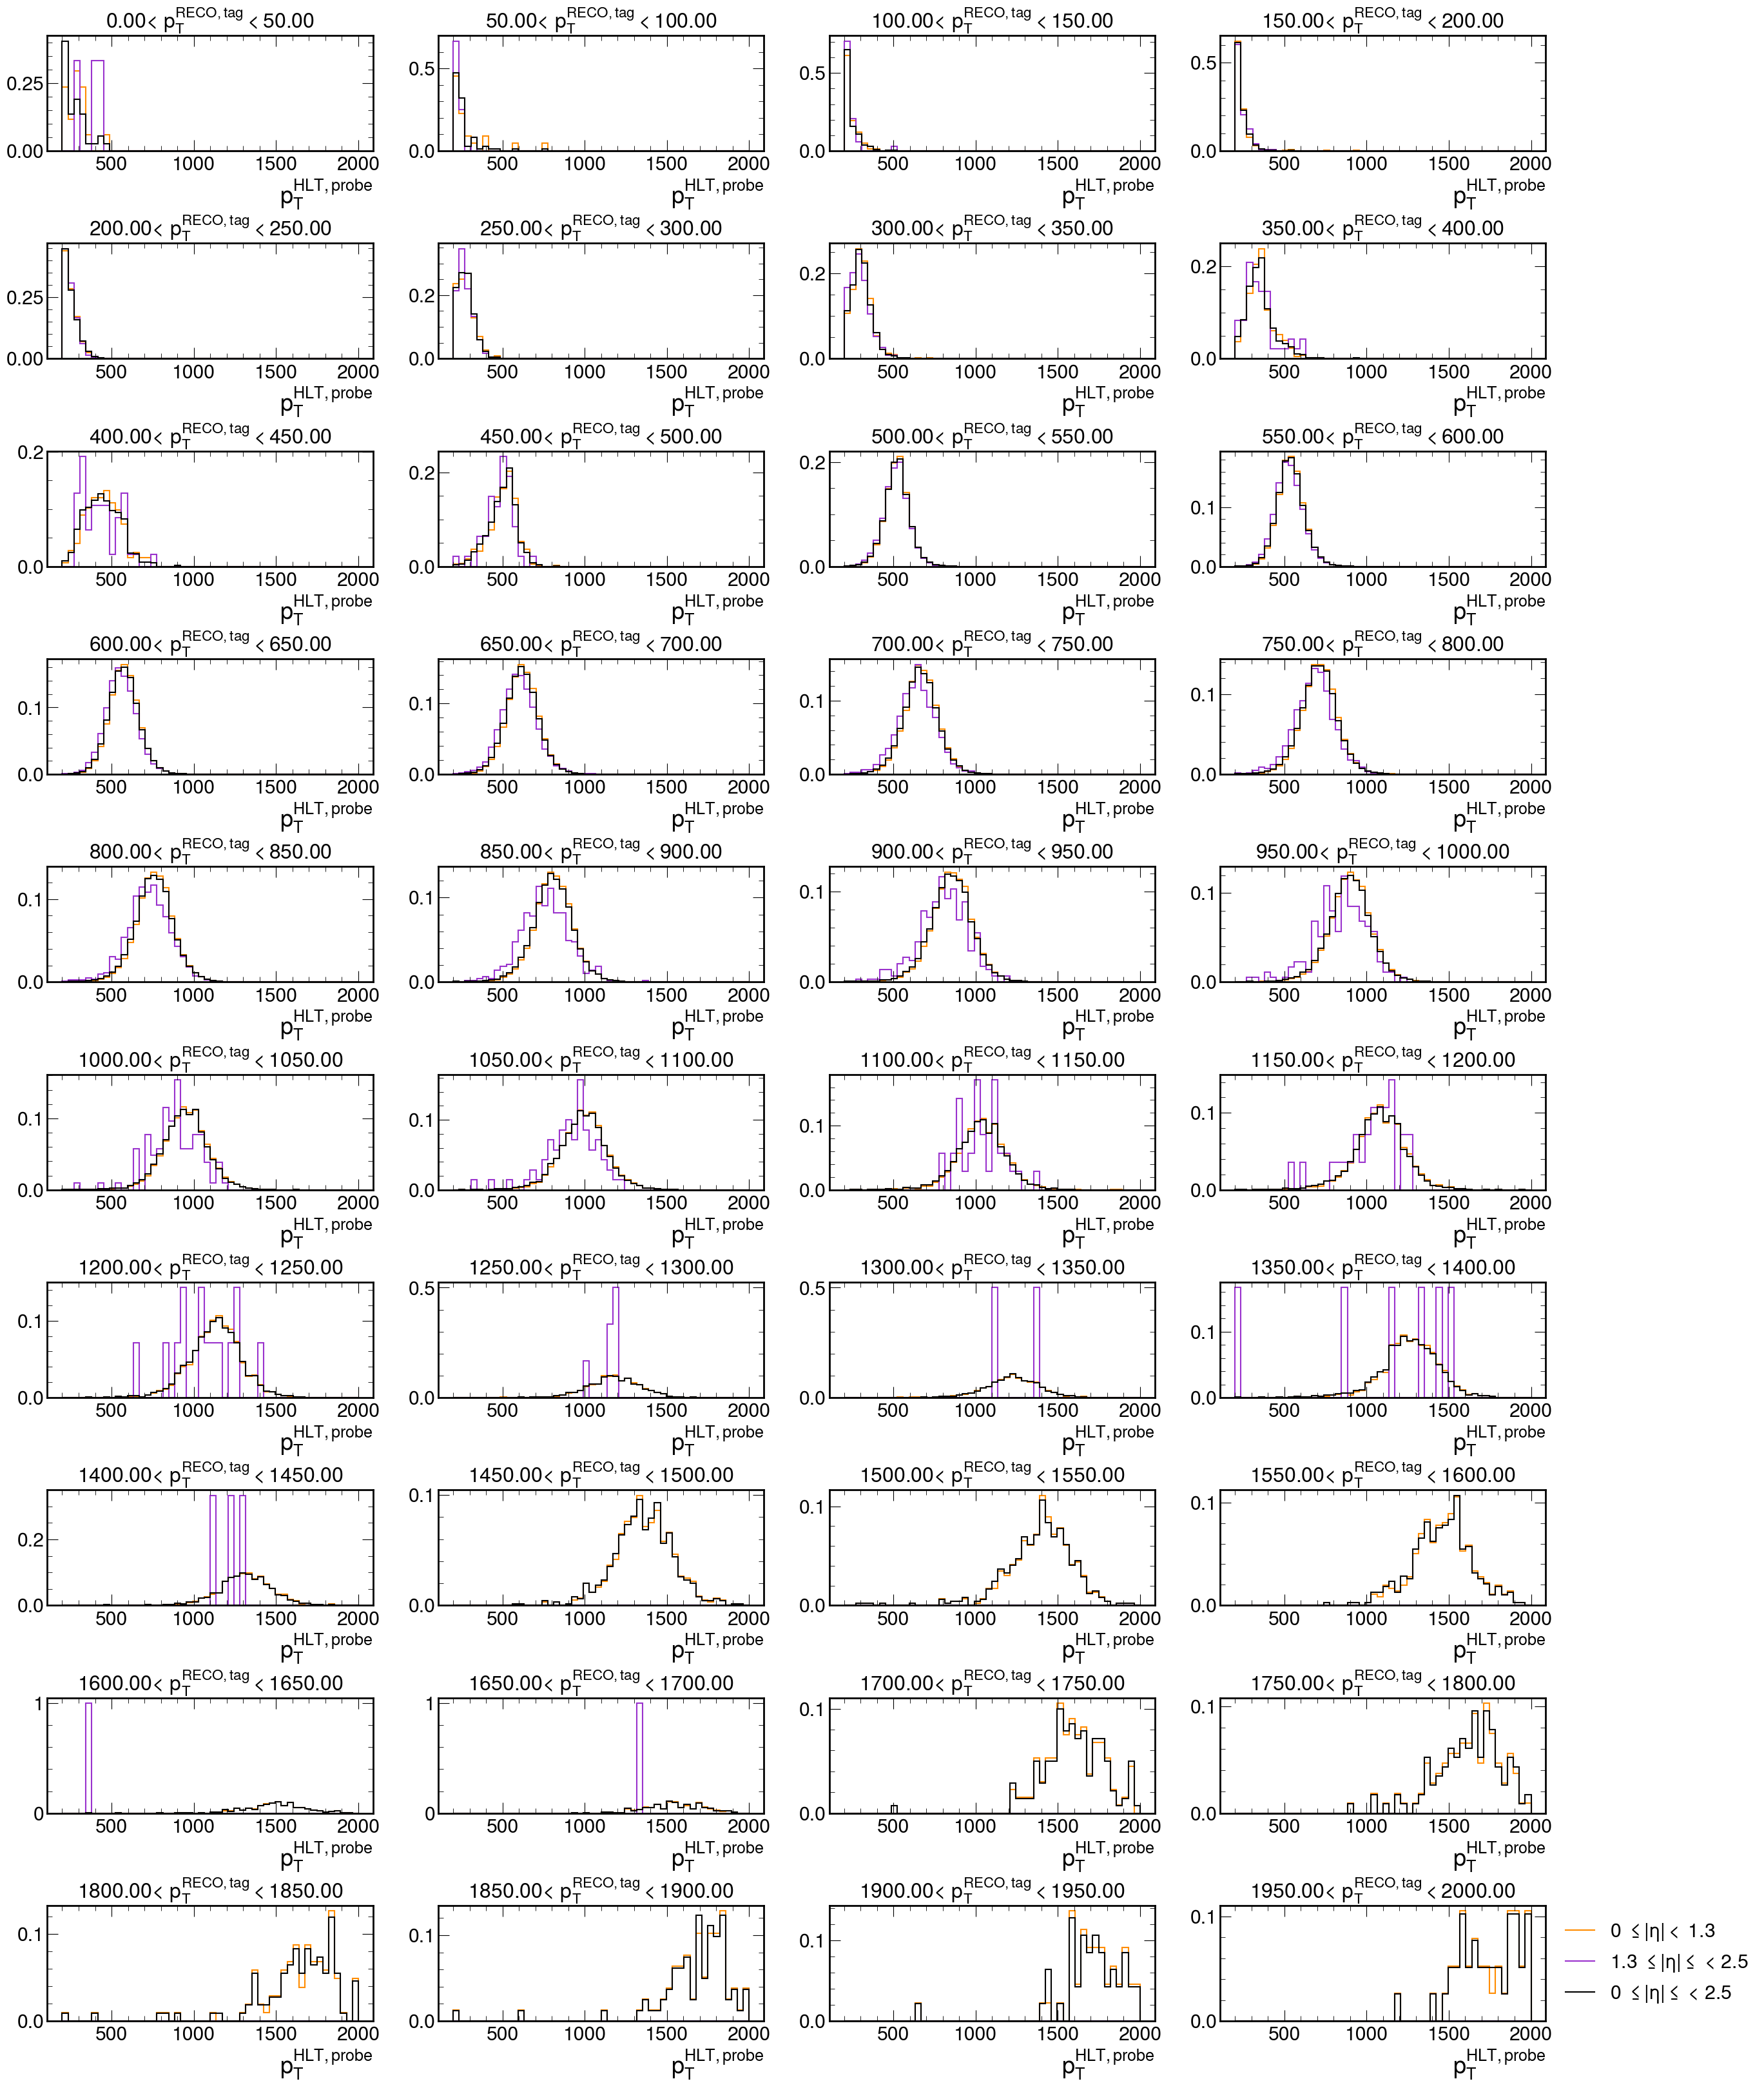

In [30]:
fig, axs = plt.subplots(10, 4, figsize=(30,40))
plt.subplots_adjust(wspace=0.2, hspace=0.8)

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

row = 0
column = 0

era = ""

for pt, output in [("low", low), ("high", high)]:
    
    centers = output["h4"].project("pt").axes[0].centers
    edges = output["h4"].project("pt").axes[0].edges

    for i, _ in enumerate(centers):

        ax = axs[row, column]

        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:

            h = output["h4"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                              "eta1" : eta1,
                              "eta2" : eta2,
                              "pt" : i}]
            h *= 1 / h.sum() if h.sum() != 0 else 1

            if i == (len(centers) - 1) and pt == "high":
                mplhep.histplot(h, color=colour[eta1], ax=ax, label=label[eta1])
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            else:
                mplhep.histplot(h, color=colour[eta1], ax=ax)

            ax.set_title(f"{edges[i]:.2f}" + r"< $p_T^{RECO,tag} <$" + f"{edges[i+1]:.2f}", fontsize=23)

        column += 1
        if column > 3:
            column = 0
            row += 1
        
for ax in axs.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

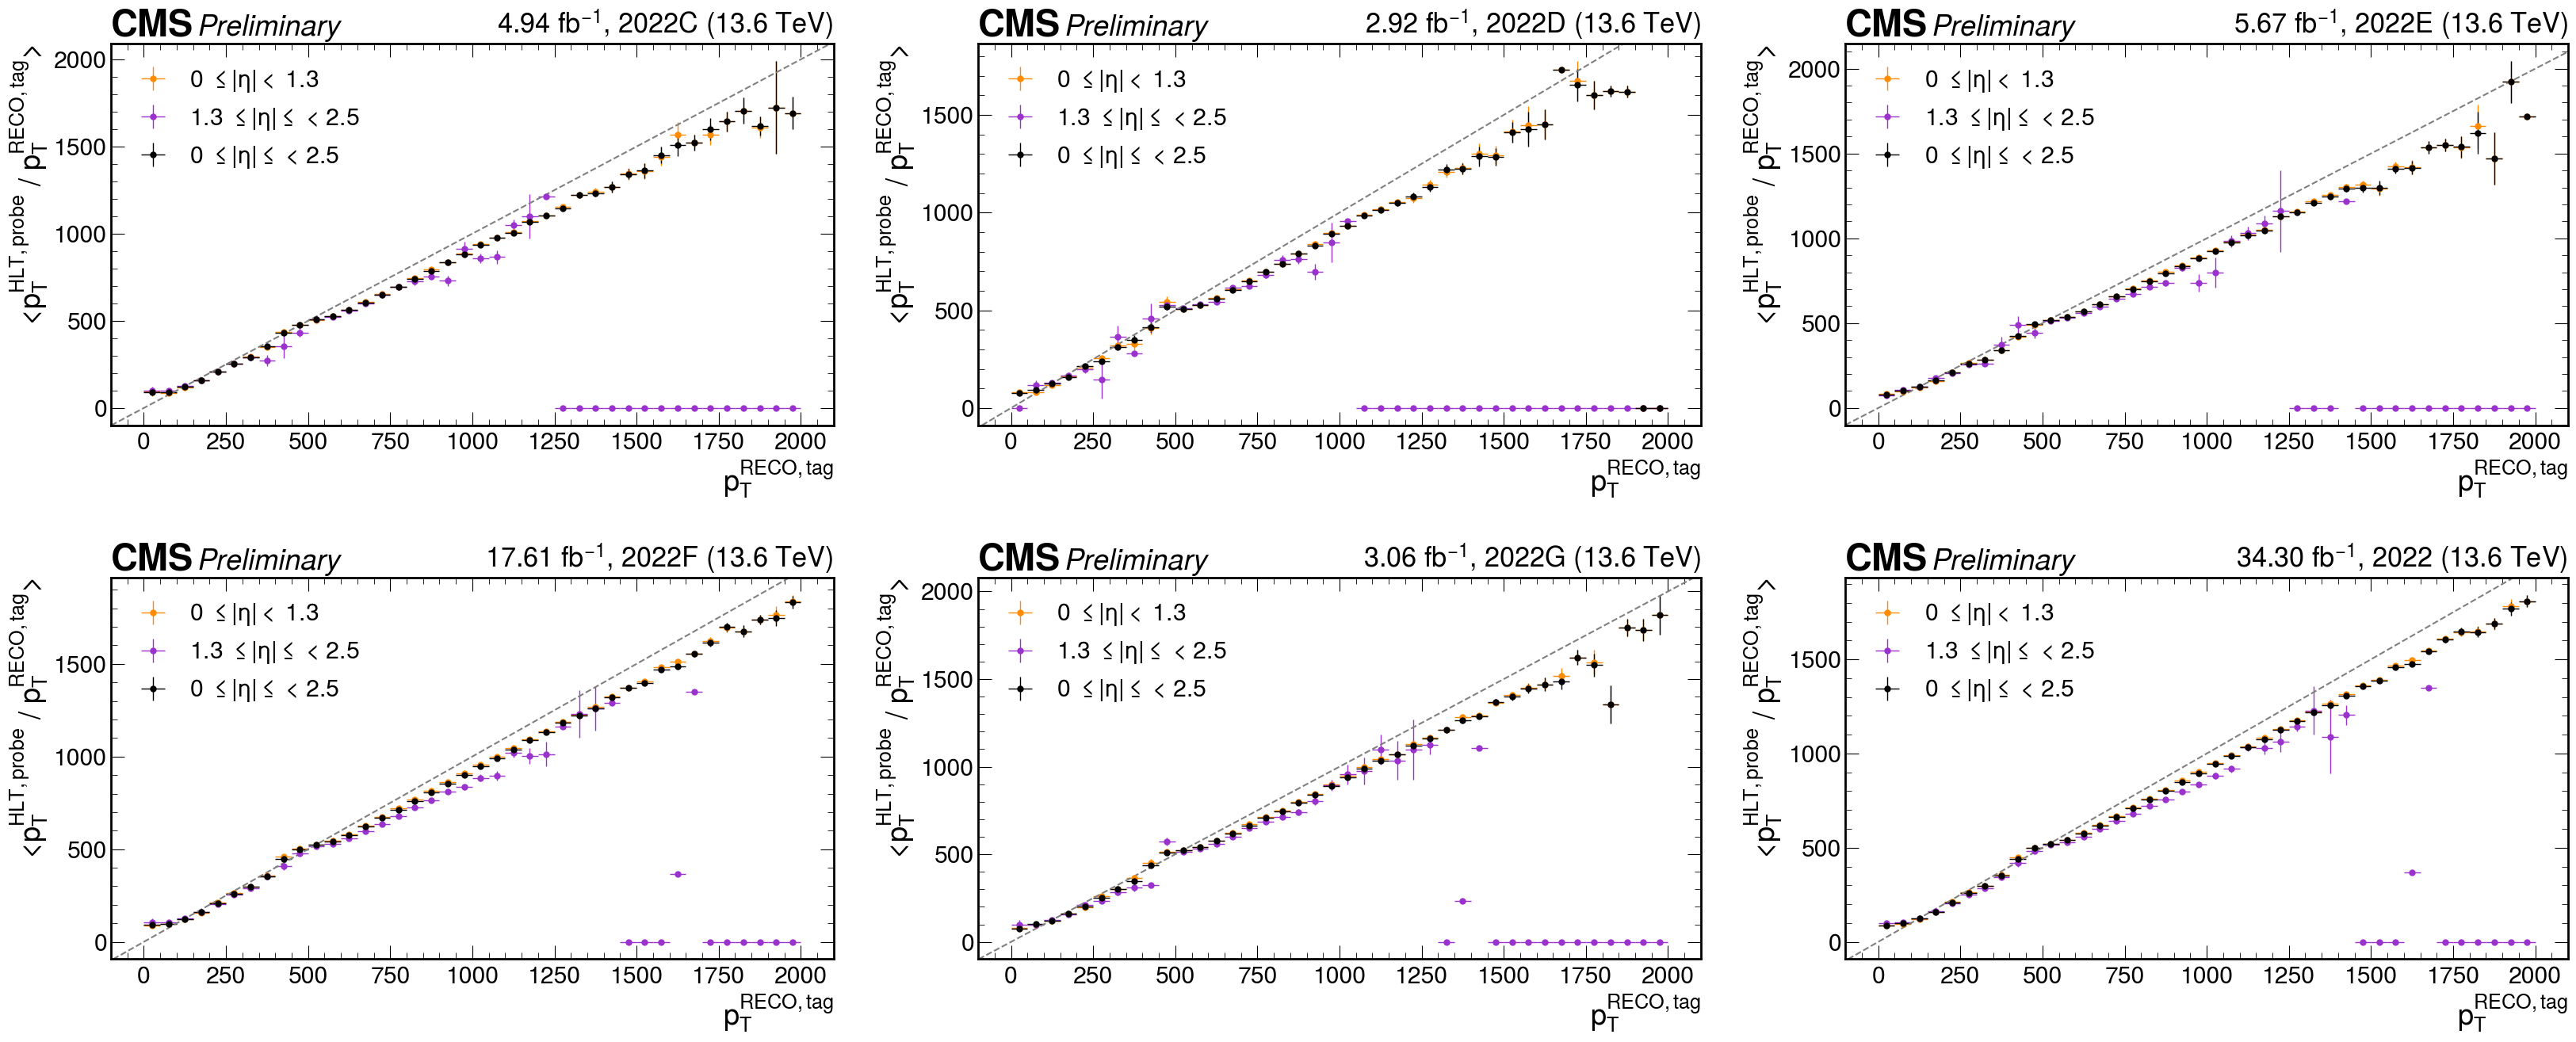

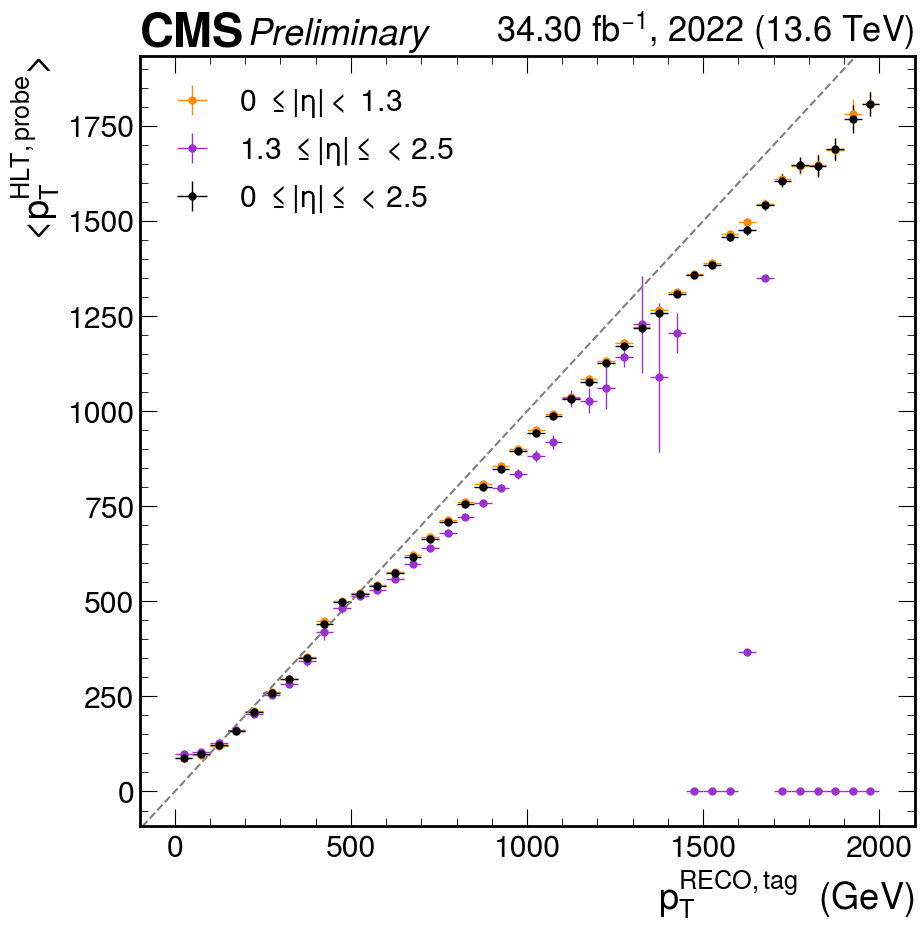

In [36]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ < 2.5",
    sum : r"0 $\leq |\eta | \leq$ < 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low), ("high", high)]:
        
        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:
        
            meanhist = output["h4_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            ax.errorbar(
                meanhist.axes[0].centers,
                meanhist.values(),
                xerr=binwidth/2,
                yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                **data_err_opts,
                label=label[eta1] if pt == "low" else "",
            )
            
            if not era:
                
                ax1.errorbar(
                        meanhist.axes[0].centers,
                        meanhist.values(),
                        xerr=binwidth/2,
                        yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                        **data_err_opts,
                        label=label[eta1] if pt == "low" else "",
                    )

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    ax.set_xlabel(r"$p_T^{RECO,tag}$")
    ax.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,tag}$>")
    ax.axline((0, 0), slope=1, color='gray',ls='--')
    ax.legend(loc="best")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
ax1.set_xlabel(r"$p_T^{RECO,tag}$  (GeV)")
ax1.set_ylabel(r"<$p_T^{HLT,probe}$>")
ax1.axline((0, 0), slope=1, color='gray',ls='--')
ax1.legend(loc="best")

# Ratio of a and b

In [18]:
low = util.load("outfiles/2022/jes_ScoutingPFMonitor_2022-CHS_had_low_all_offlinePuppi.coffea")[0]
high = util.load("outfiles/2022/jes_ScoutingPFMonitor_2022-CHS_had_high_offlinePuppi.coffea")[0]

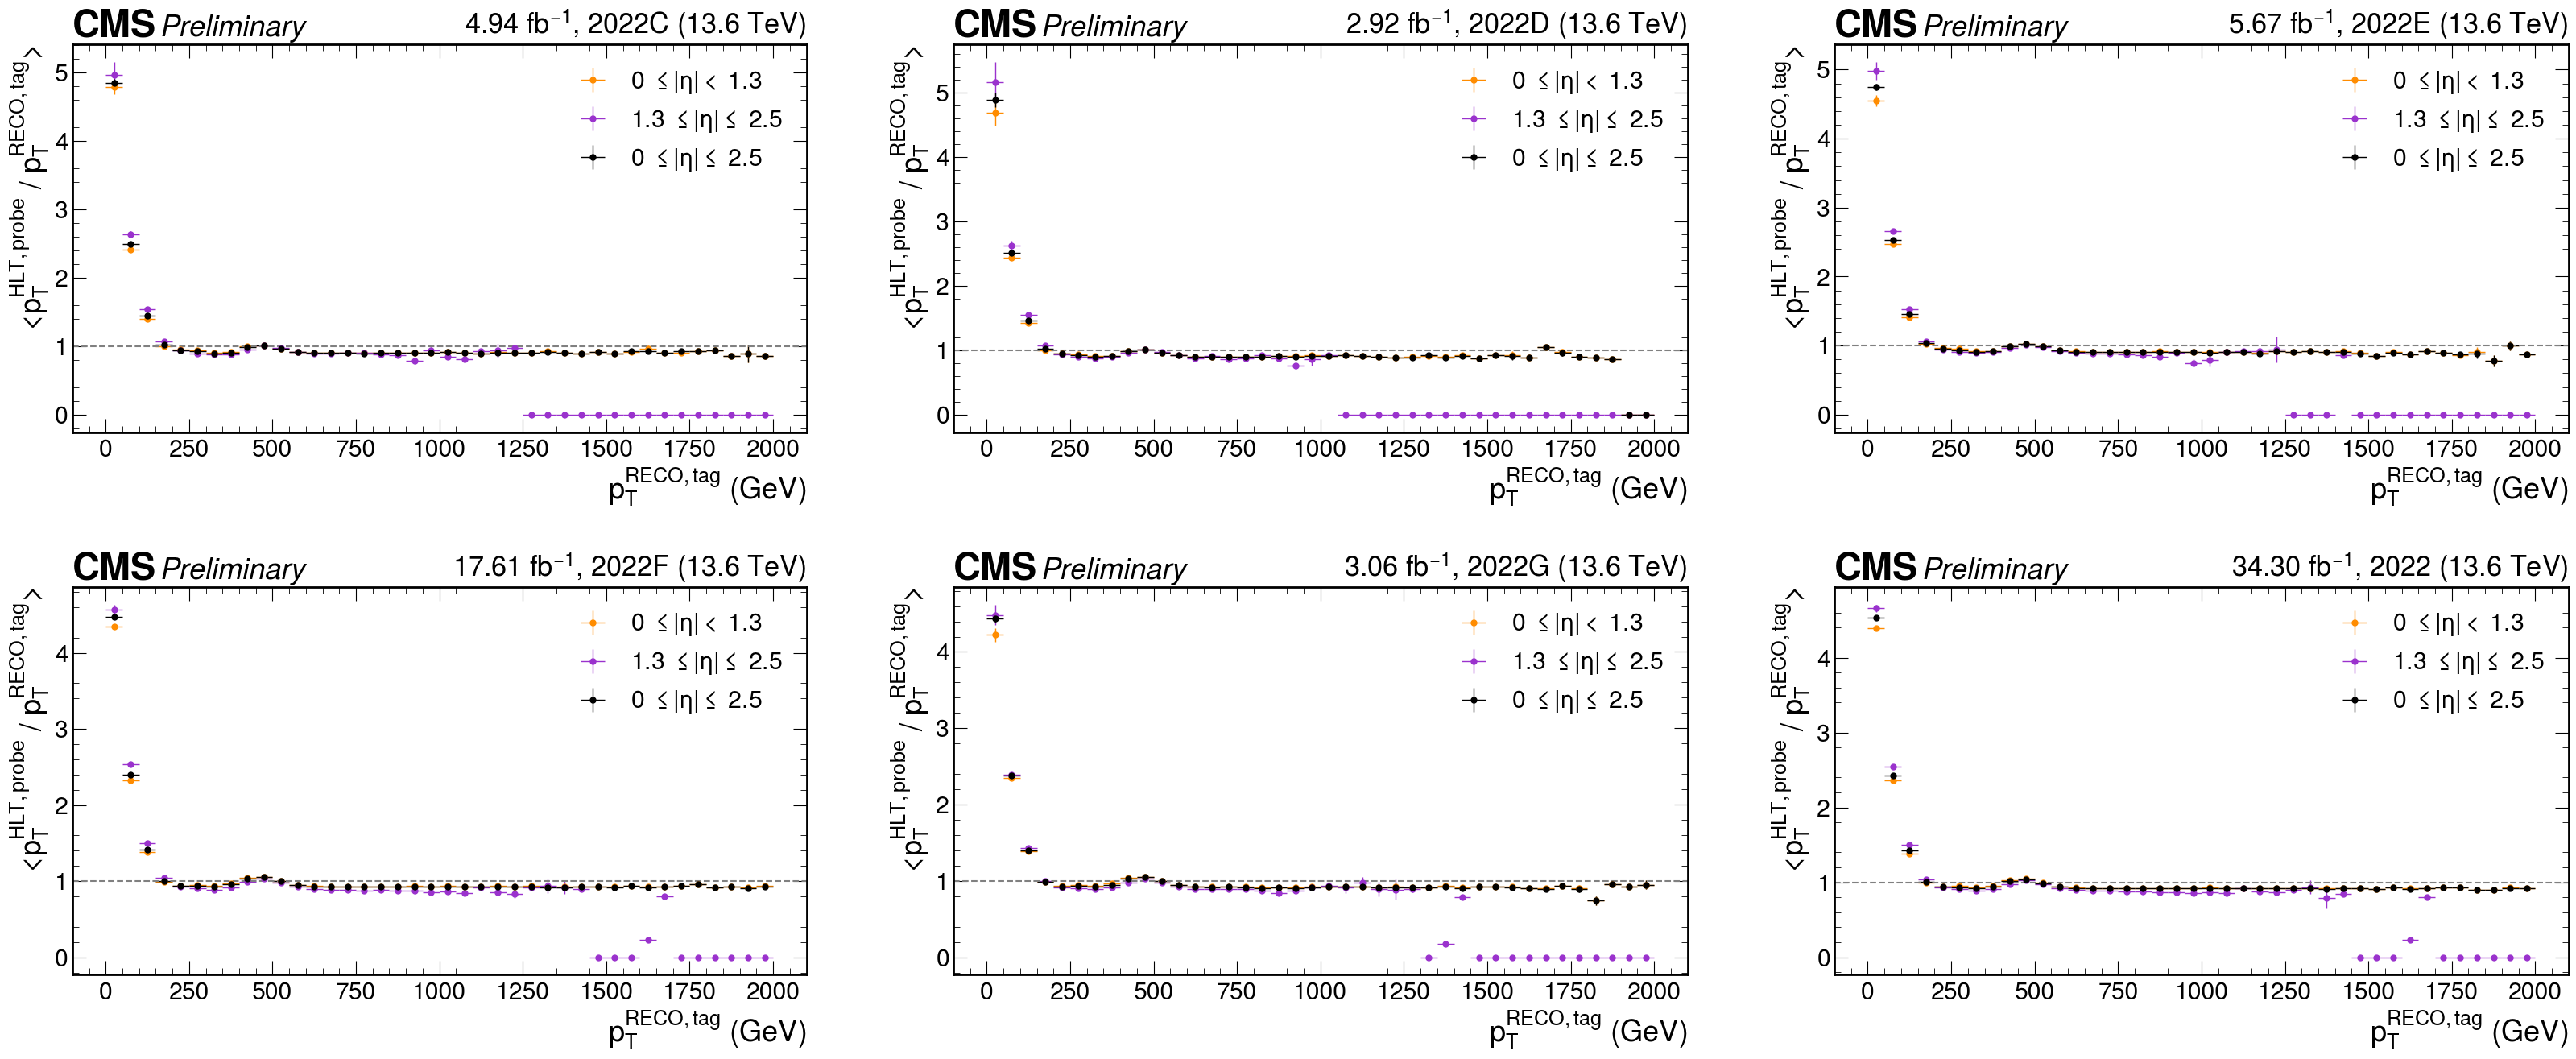

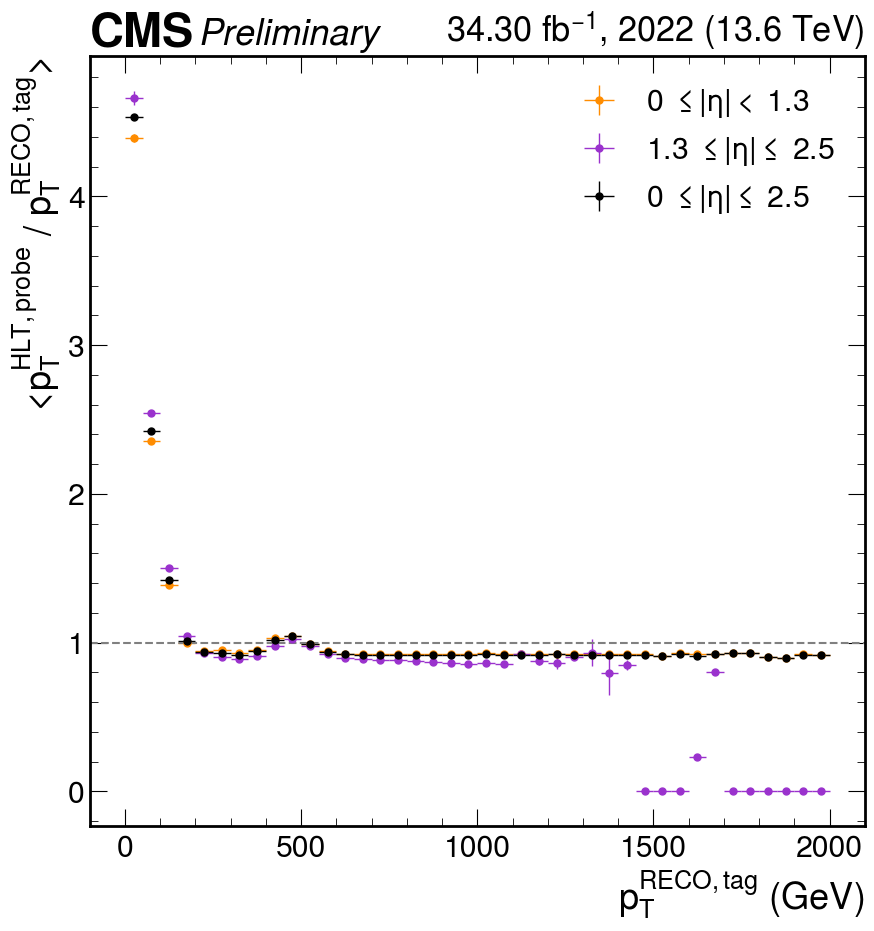

In [19]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ 2.5",
    sum : r"0 $\leq |\eta | \leq$ 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low), ("high", high)]:
        
        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:
        
            meanhist = output["h1_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            ax.errorbar(
                meanhist.axes[0].centers,
                meanhist.values(),
                xerr=binwidth/2,
                yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                **data_err_opts,
                label=label[eta1] if pt == "low" else "",
            )
            
            if not era:
                
                ax1.errorbar(
                        meanhist.axes[0].centers,
                        meanhist.values(),
                        xerr=binwidth/2,
                        yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                        **data_err_opts,
                        label=label[eta1] if pt == "low" else "",
                    )

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    ax.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
    ax.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,tag}$>")
    ax.axhline(1, color='gray',ls='--')
    #ax.set_ylim(0.9, 1.1)
    ax.legend(loc="best")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
ax1.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
ax1.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,tag}$>")
ax1.axhline(1, color='gray',ls='--')
#ax1.set_ylim(0.9, 1.1)
ax1.legend(loc="best")

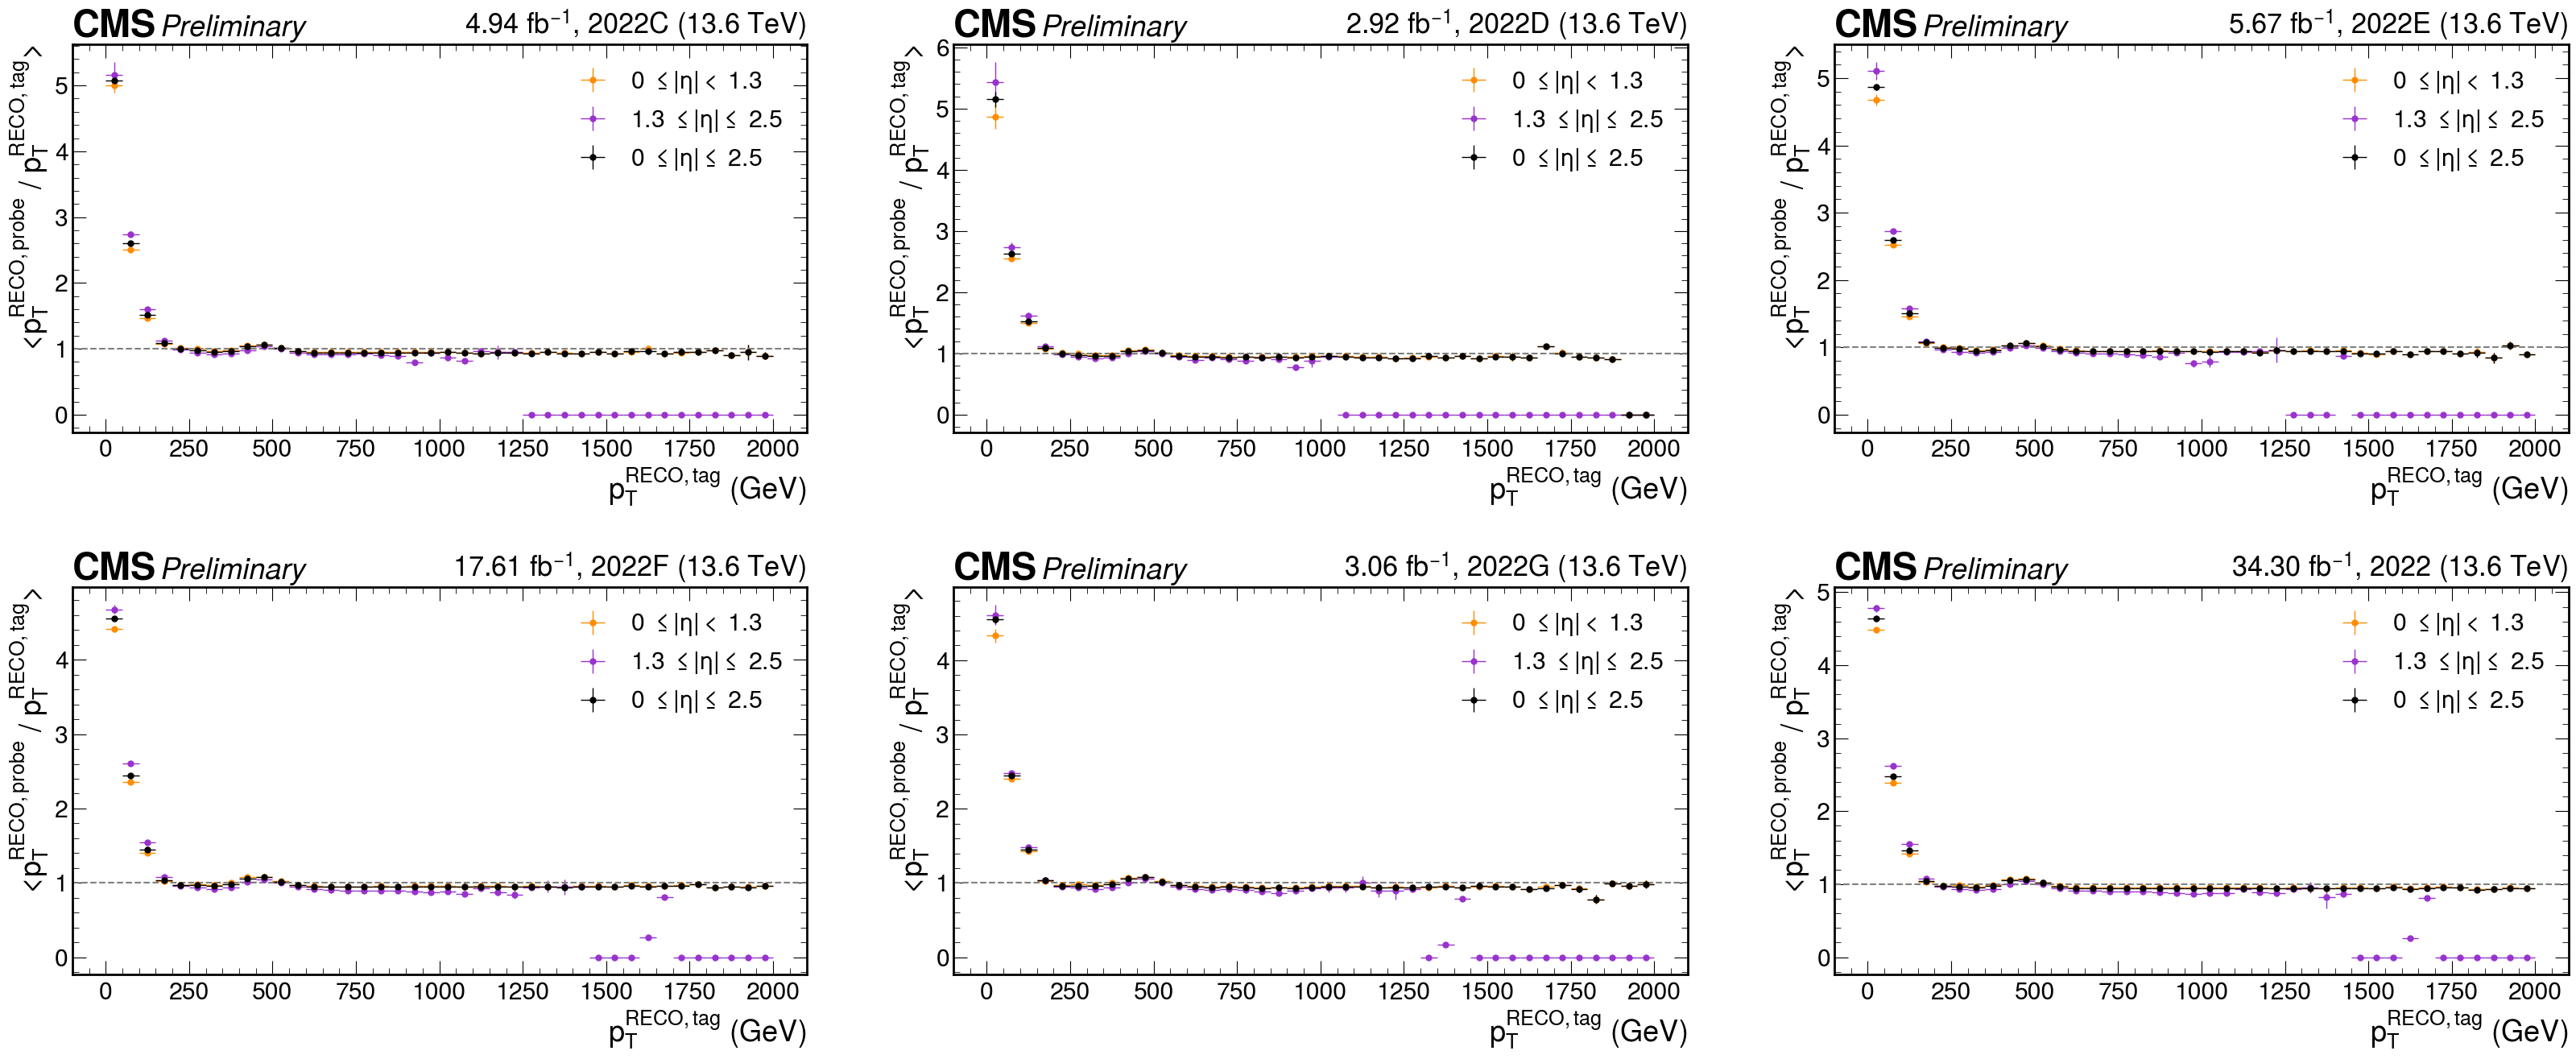

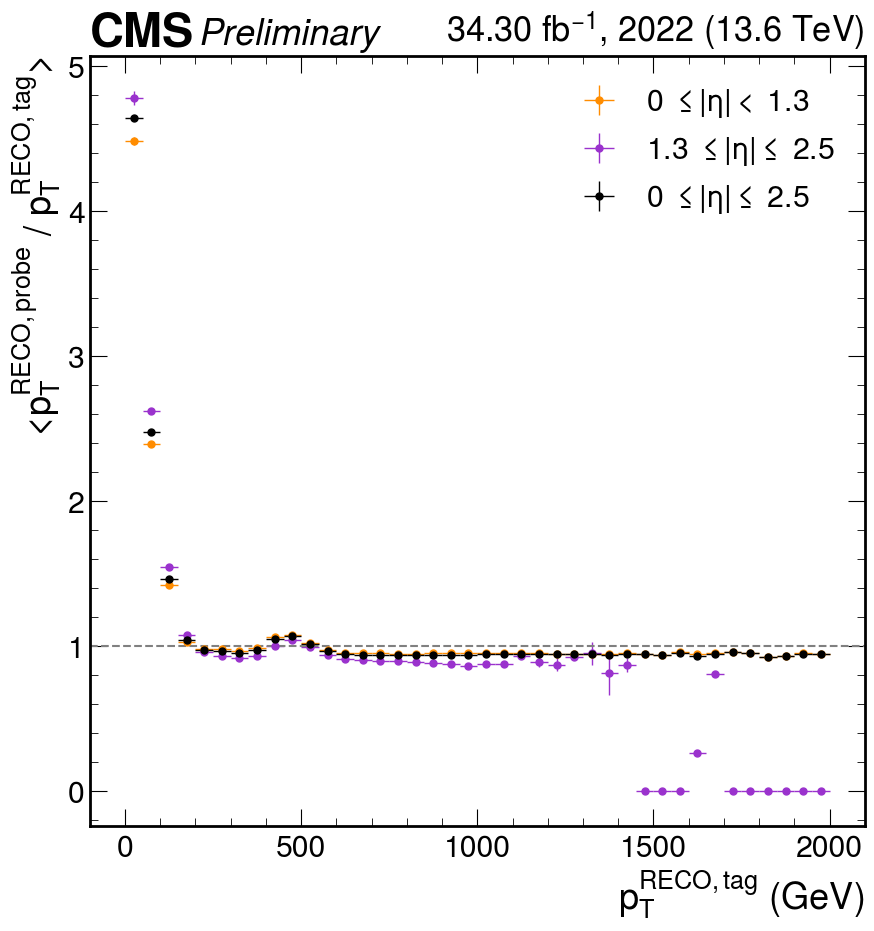

In [24]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ 2.5",
    sum : r"0 $\leq |\eta | \leq$ 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low), ("high", high)]:
        
        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:
        
            meanhist = output["h2_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            ax.errorbar(
                meanhist.axes[0].centers,
                meanhist.values(),
                xerr=binwidth/2,
                yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                **data_err_opts,
                label=label[eta1] if pt == "low" else "",
            )
            
            if not era:
                
                ax1.errorbar(
                        meanhist.axes[0].centers,
                        meanhist.values(),
                        xerr=binwidth/2,
                        yerr=[err * 1 for err in err(meanhist) / np.sqrt(meanhist.counts())],
                        **data_err_opts,
                        label=label[eta1] if pt == "low" else "",
                    )

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    ax.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
    ax.set_ylabel(r"<$p_T^{RECO,probe}$ / $p_T^{RECO,tag}$>")
    ax.axhline(1, color='gray',ls='--')
    #ax.set_ylim(0.9, 1.1)
    ax.legend(loc="best")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
ax1.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
ax1.set_ylabel(r"<$p_T^{RECO,probe}$ / $p_T^{RECO,tag}$>")
ax1.axhline(1, color='gray',ls='--')
#ax1.set_ylim(0.9, 1.1)
ax1.legend(loc="best")

/tmp/ipykernel_30/2219461892.py:62: RuntimeWarning: invalid value encountered in divide
  meanhist1.values() / meanhist2.values(),
/tmp/ipykernel_30/2219461892.py:73: RuntimeWarning: invalid value encountered in divide
  meanhist1.values() / meanhist2.values(),


(300.0, 1000.0)

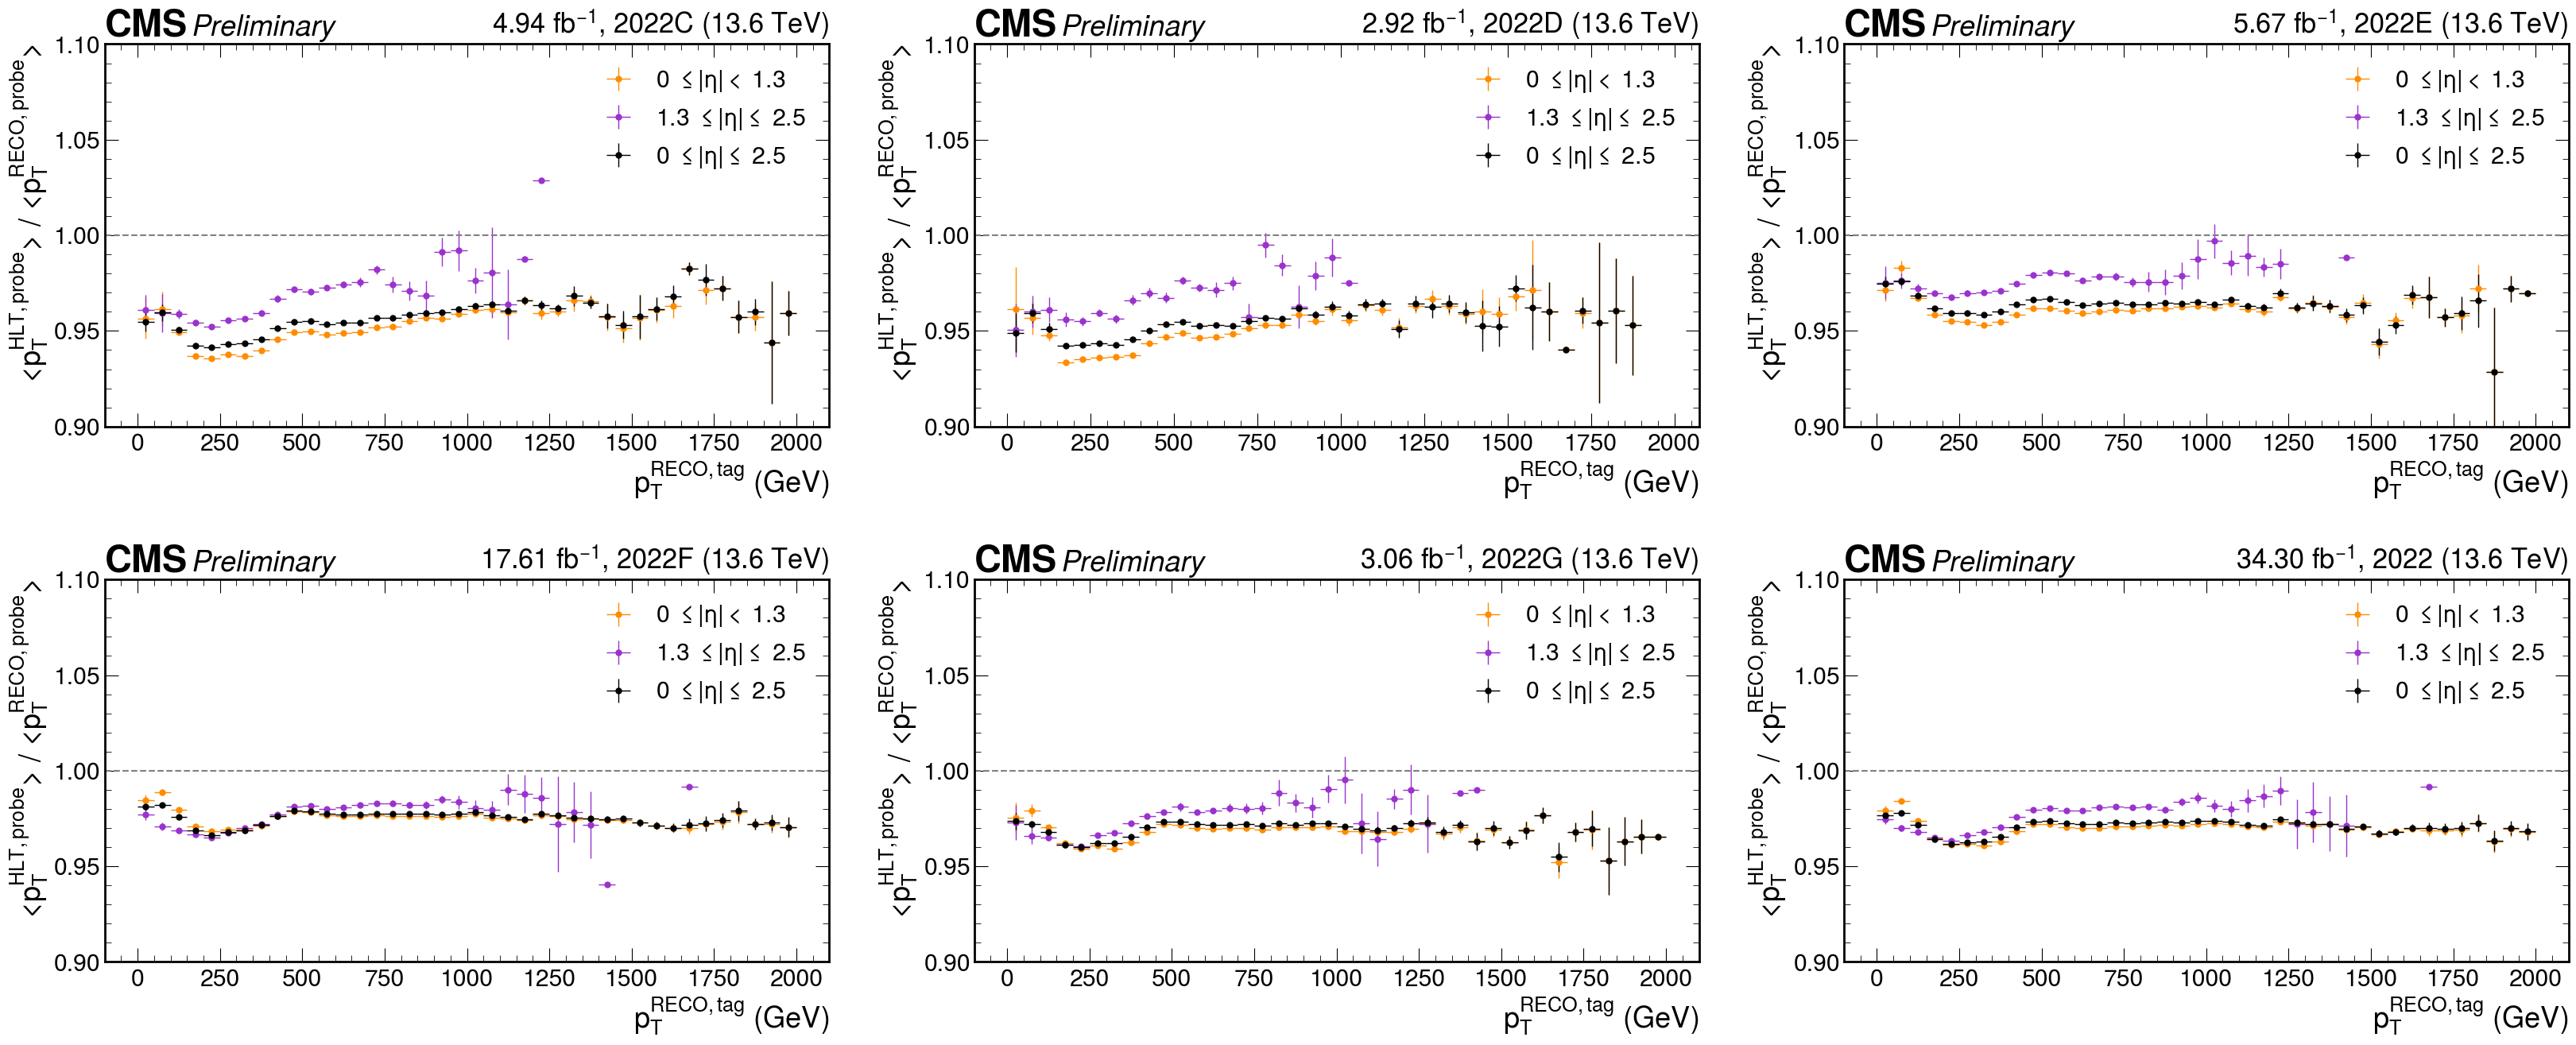

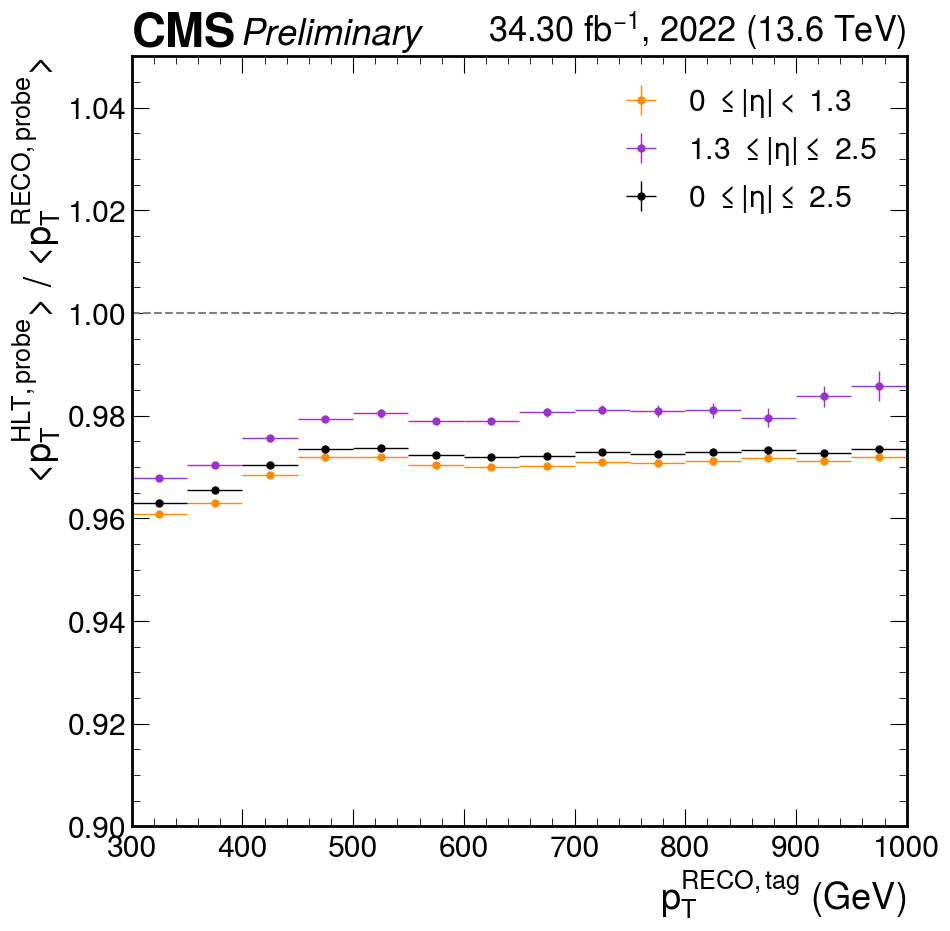

In [33]:
lumi = {
    "C" : 4.943,
    "D" : 2.922 ,
    "E" : 5.672,
    "F" : 17.610,
    "G" : 3.055,
    "" : 34.2984,
}

label = {
    0 : r"0 $\leq |\eta | <$ 1.3",
    1 : r"1.3 $\leq |\eta | \leq$ 2.5",
    sum : r"0 $\leq |\eta | \leq$ 2.5",
}

colour = {
    0 : "#FF8C00",
    1 : "#9A32CD",
    sum : "black",
}

def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, axs = plt.subplots(2, 3, figsize=(40,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig1, ax1 = plt.subplots(figsize=(10, 10))

row = 0
column = 0

for era in ["C", "D", "E", "F", "G", ""]:
    
    ax = axs[row, column]
    
    for pt, output in [("low", low), ("high", high)]:
        
        for eta1, eta2 in [(0, 0), (1, 1), (sum, sum)]:
        
            meanhist1 = output["h1_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            meanhist2 = output["h2_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                           "eta1" : eta1,
                                           "eta2" : eta2}]
            h3 = output["h3_mean"][{"dataset" : sum if not era else hist.loc("2022" + era), 
                                   "eta1" : eta1,
                                   "eta2" : eta2}]
            binwidth = meanhist1.axes[0].centers[2] - meanhist1.axes[0].centers[1]

            data_err_opts = {
                        'linestyle': 'none',
                        'marker': '.',
                        'markersize': 10.,
                        'color': colour[eta1],
                        'elinewidth': 1,
                    }
            
            ax.errorbar(
                meanhist1.axes[0].centers,
                meanhist1.values() / meanhist2.values(),
                xerr=binwidth/2,
                yerr=[err * 1 for err in err(h3) / np.sqrt(h3.counts())],
                **data_err_opts,
                label=label[eta1] if pt == "low" else "",
            )
            
            if not era:
                
                ax1.errorbar(
                        meanhist1.axes[0].centers,
                        meanhist1.values() / meanhist2.values(),
                        xerr=binwidth/2,
                        yerr=[err * 1 for err in err(h3) / np.sqrt(h3.counts())],
                        **data_err_opts,
                        label=label[eta1] if pt == "low" else "",
                    )

    mplhep.cms.label(ax=ax, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
    ax.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
    ax.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$>")
    ax.axhline(1, color='gray',ls='--')
    ax.set_ylim(0.9, 1.1)
    ax.legend(loc="best")
    
    column += 1
    if column > 2:
        column = 0
        row += 1
        
mplhep.cms.label(ax=ax1, data=True, year="2022" + era, com=13.6, label="Preliminary", lumi=f"{lumi[era]:.2f}")
ax1.set_xlabel(r"$p_T^{RECO,tag}$ (GeV)")
ax1.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$>")
ax1.axhline(1, color='gray',ls='--')
ax1.set_ylim(0.9, 1.05)
ax1.legend(loc="best")
ax1.set_xlim(300, 1000)